In [4]:
import pandas as pd
import os
#import tldextract
#import urlcanon
import matplotlib.pyplot as plt
import csv
import collections
import numpy as np
import time
from itertools import repeat
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import collections
import requests
import multiprocessing
#import seaborn as sns
#!pip3.5 install seaborn --user

In [11]:
######### analysis start from here:
## load full dataset

df = pd.read_csv('detected_arxiv_url_info_100422.tsv', sep='\t')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df['PAPER_ID'] =df['PAPER_ID'].astype('str')

In [6]:
# focus the analysis between 2011 and 2021
df = df[df['year']>=2011]
df = df[df['year']<=2021]


In [7]:
# focus the analysis on computer science, math and physics
df = df[df['categories_top_final'].isin(['cs','math','physics'])]

In [10]:
# column 'label' indicates category of the link artifacts
# they are classified into “Material" (data), "Method" (method), and "Supplement" (supplement), based on taxonomy by Zhao et al.


for field in ['cs','physics','math']:
    print (field)
    df_temp = df[df['categories_top_final']==field]
    print (len(df_temp[df_temp['label']=='Supplement']))
    

cs
83413
physics
110693
math
47338


In [132]:
# links number for different types of artifacts in different fields
label = 'Material'

print ('overall')
df_temp2 = df[df['label']==label]
print (len(set(df_temp2['URLS_reextracted_normalized_stripped'])))

for field in ['cs','physics','math']:
    print (field)
    df_temp = df[df['categories_top_final']==field]
    df_temp2 = df_temp[df_temp['label']==label]
    print (len(set(df_temp2['URLS_reextracted_normalized_stripped'])))


overall
56132
cs
35995
physics
20153
math
3879


In [8]:
# live links number for different types of artifacts in different fields
label = 'Method'

print ('overall')
df_temp2 = df[df['label']==label]
df_temp3 = df_temp2[df_temp2['http_code']=='200']
print (len(set(df_temp3['URLS_reextracted_normalized_stripped'])))

for field in ['cs','physics','math']:
    print (field)
    df_temp = df[df['categories_top_final']==field]
    df_temp2 = df_temp[df_temp['label']==label]
    df_temp3 = df_temp2[df_temp2['http_code']=='200']
    print (len(set(df_temp3['URLS_reextracted_normalized_stripped'])))

#len(set(df['URLS_reextracted_normalized_stripped']))

overall
107962
cs
70633
physics
34557
math
9092


In [21]:
# show top links of a specific type in each field, and their number of occurences
label = 'Method'


df_temp2 = df[df['label']==label]
#df_temp3 = df_temp2[df_temp2['http_code']=='200']
#print (len(set(df_temp3['URLS_reextracted_normalized_stripped'])))

for field in ['cs','physics','math']:
    print (field)
    df_temp = df[df['categories_top_final']==field]
    df_temp2 = df_temp[df_temp['label']==label]
    #df_temp3 = df_temp2[df_temp2['http_code']=='200']
    #print (len(set(df_temp3['URLS_reextracted_normalized_stripped'])))
    total_record = len(df_temp2)
    print (total_record)
    top_urls = [url for url, url_count in collections.Counter(df_temp2['URLS_reextracted_normalized_stripped']).most_common(10)]
    top_url_count = [url_count for url, url_count in collections.Counter(df_temp2['URLS_reextracted_normalized_stripped']).most_common(10)]
    top_url_prop = [url_count/total_record for url, url_count in collections.Counter(df_temp2['URLS_reextracted_normalized_stripped']).most_common(10)]
    
    print (top_urls)
    print (top_url_count)
    print (top_url_prop)

cs
119751
['pytorch.org/', 'github.com/huggingface/transformers', 'spacy.io/', 'tensorflow.org/', 'github.com/google-research/bert', 'scikit-learn.org/', 'nlp.stanford.edu/projects/glove', 'nltk.org/', 'ctan.org/pkg/booktabs', 'acm.org/publications/class-2012']
[555, 406, 376, 337, 333, 286, 269, 233, 209, 208]
[0.004634616829922088, 0.003390368347654717, 0.00313984851901028, 0.0028141727417725112, 0.002780770097953253, 0.002388289033076968, 0.0022463277968451205, 0.0019457040024717957, 0.001745288139556246, 0.0017369374786014313]
physics
104718
['iram.fr/IRAMFR/GILDAS', 'dirac.ac.uk', 'astropy.org/', 'casa.nrao.edu/', 'iraf.noao.edu/', 'camb.info/', 'fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html', 'scipy.org/', 'healpix.sourceforge.net/', 'python.org/']
[962, 621, 527, 454, 441, 434, 287, 255, 241, 238]
[0.009186577283752554, 0.005930212570904716, 0.005032563647128479, 0.004335453312706507, 0.00421131037643958, 0.0041444641799881585, 0.0027406940545082986, 0.0024351114

# plot distribution of link occurences

In [260]:
freq = [i[1] for i in collections.Counter(df['URLS_reextracted_normalized']).most_common()]
url = [i[0] for i in collections.Counter(df['URLS_reextracted_normalized']).most_common()]

In [261]:
len(freq)

302470

/afs/cs.stanford.edu/u/hanchcao/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


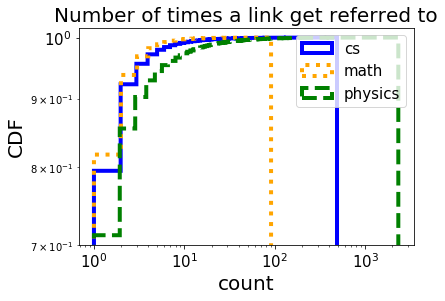

In [53]:
for field in set(df['categories_top_final']):
    df_temp = df[df['categories_top_final']==field]
    freq = [i[1] for i in collections.Counter(df_temp['URLS_reextracted_normalized']).most_common()]
    url = [i[0] for i in collections.Counter(df_temp['URLS_reextracted_normalized']).most_common()]
    if field == 'cs':
        plt.hist(freq, normed=True, cumulative=True, histtype='step',
           bins=5000,color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.hist(freq, normed=True, cumulative=True, histtype='step',
         bins=5000,color = 'green', linewidth=4,linestyle = 'dashed', label=field)
    if field == 'math':
        plt.hist(freq, normed=True, cumulative=True, histtype='step',
           bins=5000,color = 'orange', linewidth=4,linestyle = 'dotted', label=field)

    
plt.legend(fontsize = 15)


plt.xscale('log')
plt.yscale('log')
    
plt.title('Number of times a link get referred to', size = 20)
plt.ylabel('CDF', fontsize = 20)
plt.xlabel('count', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [228]:
for field in set(df['categories_top_final']):
    df_temp = df[df['categories_top_final']==field]
    freq = [i[1]/len(df_temp) for i in collections.Counter(df_temp['URLS_reextracted_normalized']).most_common()]

,Unnamed: 0,Unnamed: 0.1,PAPER_ID,SEC_INDEX,POS_INDEX,SECTION,IsFOOTNOTE,FOOTNOTE,CONTEXT,CONTEXT_PAR,...,SECTION_INDEX,SECTION_TOTAL,SECTION_POS_PROPORTION,PAR_TOTAL_LENGTH,PAR_INDEX,PAR_POS_PROPORTION,PAR_POS_PROPORTION_bin,SECTION_POS_PROPORTION_bin,title,n_citations
61,61,109799,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,NaN,NaN,NaN,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0
62,62,109800,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,NaN,NaN,NaN,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0
63,63,116590,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,NaN,NaN,NaN,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0
64,64,116591,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,NaN,NaN,NaN,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0
65,65,117764,1207.3836,body_text,4,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,It was followed up photometrically by VSNET FO...,"In this paper, we present optical spectroscopy...",...,2.0,12.0,0.166667,47.0,13.0,0.276596,30%,20%,CSS100603:112253−111037: a helium-rich dwarf n...,35.0
66,66,185828,1409.939,body_text,7,Observations and data analysis,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,In order to assess when the low and high optic...,In order to assess when the low and high optic...,...,4.0,21.0,0.190476,64.0,19.0,0.296875,30%,20%,X-Ray Observations of VY Scl-Type Nova-Like Bi...,14.0
67,67,189519,1407.1907,body_text,23,Notes on individual objects::AM CVn systems an...,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,An outburst spectrum of CRTS J102842.9-081927 ...,There are several other AM CVn candidates and ...,...,7.0,28.0,0.250000,121.0,36.0,0.297521,30%,30%,1000 cataclysmic variables from the catalina r...,62.0
68,68,212384,1506.8526,body_text,1,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,VSNET alert-news FOOTREF2 reported on the dete...,P. Berardi (cf. TOCP) on Oct 30.8 UT and Santa...,...,2.0,8.0,0.250000,37.0,8.0,0.216216,30%,30%,"Outburst evolution, historic light curve and a...",0.0
69,69,213305,1502.14,body_text,5,Introduction Introduction,1,"VSNET, at http://www.kusastro.kyoto-u.ac.jp/vs...",MLS110213 is included in the RK catalogue base...,"As of June 2014 FOOTREF5 , 114 polars have bee...",...,2.0,15.0,0.133333,65.0,14.0,0.215385,30%,20%,MLS110213:022733+130617: A new eclipsing polar...,6.0
70,70,341762,1802.6659,body_text,7,Observations of a bright microlensing event,1,See and http://www.kusastro.kyoto-u.ac.jp/vsnet/,Following a VSNET (Variable Star Network FOOTR...,Following a VSNET (Variable Star Network FOOTR...,...,3.0,7.0,0.428571,58.0,20.0,0.344828,40%,50%,Discovery of a bright microlensing event with ...,15.0


In [262]:
for field in set(df['categories_top_final']):
    print (field)
    df_temp = df[df['categories_top_final']==field]
    df_temp = df_temp[df_temp['label']=='Method']
    for proportion in [0.01,0.05,0.1,0.2,0.3]:
        print ('most popular ' + str(proportion)+ ' link account for ')

        print(str(np.sum([i[1]/len(df_temp) for i in collections.Counter(df_temp['URLS_reextracted_normalized']).most_common(int(proportion*len(df_temp)))]))+' total records')
    print ('****************')

physics
most popular 0.01 link account for 
0.31063427490975765 total records
most popular 0.05 link account for 
0.5214958268874501 total records
most popular 0.1 link account for 
0.6363280429343571 total records
most popular 0.2 link account for 
0.7655130923050479 total records
most popular 0.3 link account for 
0.8655150021963751 total records
****************
math
most popular 0.01 link account for 
0.07777534805743859 total records
most popular 0.05 link account for 
0.19083023543990085 total records
most popular 0.1 link account for 
0.2908375246009184 total records
most popular 0.2 link account for 
0.4091406079160288 total records
most popular 0.3 link account for 
0.5091478970770463 total records
****************
cs
most popular 0.01 link account for 
0.16515102170336782 total records
most popular 0.05 link account for 
0.3009327688286528 total records
most popular 0.1 link account for 
0.40094028442351204 total records
most popular 0.2 link account for 
0.5259079256123121 t

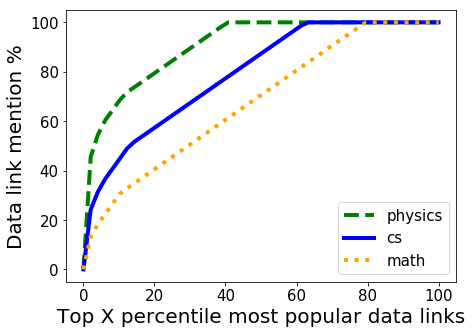

In [144]:
plt.figure(figsize = (7,5))
for field in set(df['categories_top_final']):
    #print (field)
    df_temp = df[df['categories_top_final']==field]
    df_temp = df_temp[df_temp['label']=='Material']
    Proportion_link = []
    Proportion_Record = []
    for proportion in np.linspace(0, 1, num=50):
        #print ('most popular ' + str(proportion)+ ' link account for ')
        Proportion_link.append(100*proportion)
        Proportion_Record.append(100*np.sum([i[1]/len(df_temp) for i in collections.Counter(df_temp['URLS_reextracted_normalized']).most_common(int(proportion*len(df_temp)))]))
        #print(str(np.sum([i[1]/len(df_temp) for i in collections.Counter(df_temp['URLS_reextracted_normalized']).most_common(int(proportion*len(df_temp)))]))+' total records')
    #print ('****************')
    
    if field == 'cs':
        plt.plot(Proportion_link, Proportion_Record, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Proportion_link, Proportion_Record,  color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Proportion_link, Proportion_Record,  color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
        
plt.legend(fontsize = 15)


#plt.title('Distribution of method link mentions vs. method link popularity' , fontsize = 20)
#plt.title('Distribution of data link mentions vs. data link popularity' , fontsize = 20)
#plt.title('Distribution of link mentions vs. link popularity' , fontsize = 20)
plt.ylabel('Data link mention %', fontsize = 20)
plt.xlabel('Top X percentile most popular data links', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# link reuse over time

In [10]:
df_original = pd.read_csv('detected_arxiv_url_info_100422.tsv', sep='\t')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df_original = df_original[df_original['categories_top_final'].isin(['cs','math','physics'])]

In [12]:
df_original['PAPER_ID'] =df_original['PAPER_ID'].astype('str')

In [13]:
# number of URLS the appeared earlier, proportion of reused unique links, proportion of reused link record
def burn_in(field,year):
    df_temp = df_original[df_original['categories_top_final']==field]
    df_prior = df_temp[df_temp['year']<year]
    df_url_prior_set = set(df_prior['URLS_reextracted_normalized'])
    df_year = df_temp[df_temp['year']==year]
    df_url_year_set = set(df_year['URLS_reextracted_normalized'])
    
    record_existing_url = df_year[df_year['URLS_reextracted_normalized'].isin(df_url_year_set.intersection(df_url_prior_set))]
    return len(df_url_prior_set), len(df_url_year_set), len(df_url_year_set.difference(df_url_prior_set)), 1-len(df_url_year_set.difference(df_url_prior_set))/len(df_url_year_set), len(record_existing_url)/len(df_year)

In [14]:
def burn_in_artifact_type(artifact, field,year):
    df_temp = df_original[df_original['categories_top_final']==field]
    df_temp = df_temp[df_temp['label']==artifact]
    df_prior = df_temp[df_temp['year']<year]
    df_url_prior_set = set(df_prior['URLS_reextracted_normalized'])
    df_year = df_temp[df_temp['year']==year]
    df_url_year_set = set(df_year['URLS_reextracted_normalized'])
    
    record_existing_url = df_year[df_year['URLS_reextracted_normalized'].isin(df_url_year_set.intersection(df_url_prior_set))]
    return len(df_url_prior_set), len(df_url_year_set), len(df_url_year_set.difference(df_url_prior_set)), 1-len(df_url_year_set.difference(df_url_prior_set))/len(df_url_year_set), len(record_existing_url)/len(df_year)

In [43]:
def burn_in_artifact_type2(artifact, field,year):
    df_temp = df_original[df_original['categories_top_final']==field]
    
    df_prior = df_temp[df_temp['year']<year]
    df_url_prior_set = set(df_prior['URLS_reextracted_normalized'])
    df_year = df_temp[df_temp['year']==year]
    df_url_year_set = set(df_year['URLS_reextracted_normalized'])
    
    record_existing_url = df_year[df_year['URLS_reextracted_normalized'].isin(df_url_year_set.intersection(df_url_prior_set))]
    record_existing_url = record_existing_url[record_existing_url['label']==artifact]
    df_year = df_year[df_year['label']==artifact]
    return len(df_url_prior_set), len(df_url_year_set), len(df_url_year_set.difference(df_url_prior_set)), 1-len(df_url_year_set.difference(df_url_prior_set))/len(df_url_year_set), len(record_existing_url)/len(df_year)

In [44]:
burn_in_artifact_type2('Method', 'cs',2020)

(91876, 43207, 36724, 0.15004513157590205, 0.2835659417937899)

In [54]:
    artifact = 'Material'
    year = 2020
    field = 'cs'
    df_temp = df_original[df_original['categories_top_final']==field]
    #df_temp = df_temp[df_temp['label']==artifact]
    df_prior = df_temp[df_temp['year']<year]
    df_url_prior_set = set(df_prior['URLS_reextracted_normalized'])
    df_year = df_temp[df_temp['year']==year]
    df_url_year_set = set(df_year['URLS_reextracted_normalized'])
    
    record_existing_url = df_year[df_year['URLS_reextracted_normalized'].isin(df_url_year_set.intersection(df_url_prior_set))]
    #record_existing_url = record_existing_url[record_existing_url['label']==artifact]
    #df_year = df_year[df_year['label']==artifact]

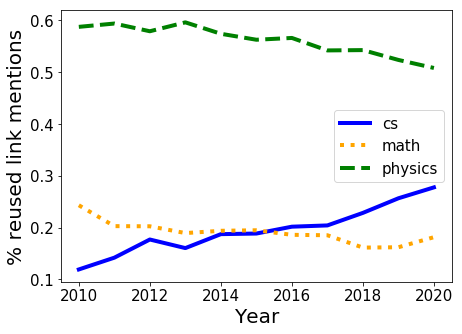

In [15]:
# proportion of link mentions that contain links appearing earlier

plt.figure(figsize = (7,5))   
for field in ['cs','math','physics']:
    proportion = []
    Year = []
    for i in range(2010,2021):
        Year.append(i)
        _, _, _, _,p= burn_in(field,i)
        proportion.append(p)
        
    if field == 'cs':
        plt.plot(Year, proportion, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, proportion, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, proportion, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)

             
plt.legend(fontsize = 15)

#plt.title('Proportion of link mentions with links from prior years' , fontsize = 20)
plt.ylabel('% reused link mentions', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

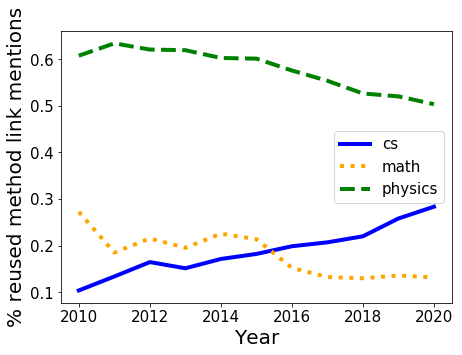

In [61]:
# proportion of link mentions that contain links appearing earlier
artifact = 'Method'

plt.figure(figsize = (7,5)) 
for field in ['cs','math','physics']:
    proportion = []
    Year = []
    for i in range(2010,2021):
        Year.append(i)
        _, _, _, _,p= burn_in_artifact_type2(artifact,field,i)
        proportion.append(p)
        
    if field == 'cs':
        plt.plot(Year, proportion, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, proportion, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, proportion, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
        
plt.legend(fontsize = 15)

#plt.title('Proportion of method link mentions with method links from prior years' , fontsize = 20)
plt.ylabel('% reused method link mentions', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

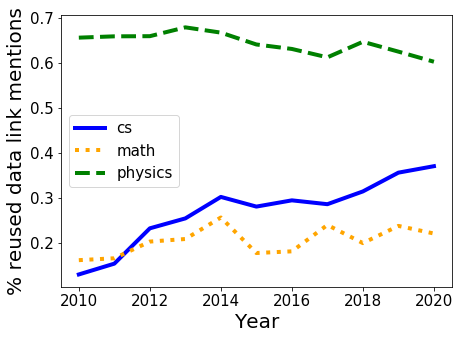

In [60]:
# proportion of link mentions that contain links appearing earlier
plt.figure(figsize = (7,5)) 
artifact = 'Material'

for field in ['cs','math','physics']:
    proportion = []
    Year = []
    for i in range(2010,2021):
        Year.append(i)
        _, _, _, _,p= burn_in_artifact_type2(artifact,field,i)
        proportion.append(p)
        
    if field == 'cs':
        plt.plot(Year, proportion, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, proportion, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, proportion, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
        
plt.legend(fontsize = 15)

#plt.title('Proportion of data link mentions with data links from prior years' , fontsize = 20)
plt.ylabel('% reused data link mentions', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# Plot the locations of links in papers over time

In [12]:
#field = 'cs'
#label = 'Method'

def plot_archetype_over_year(field, label):
    df_field0 = df[df['categories_top_final']==field]
    Freq = []
    Year = []
    for year in range(2011,2022):
        df_field = df_field0[df_field0['year'] == year]
        #df_field_pos = df_field[df_field['POS_INDEX']<=500]
        temp = df_field.groupby('SECTION_POS_PROPORTION_bin')['label'].value_counts().unstack('label')[label].reset_index()
        b= temp.iloc[1].copy()
        temp.loc[10] = b
        temp = temp.drop([1])
        freq = temp[label].tolist()
        freq = [0 if x != x else x for x in freq]
        freq = freq / np.array(freq).sum()
        Freq.append(freq)
        Year.append(year)

    #plt.title(field +' ' + year)
    #plt.xlabel('section position')
    #plt.ylabel('number of links')
    #plt.show()
    
    plt.figure(figsize = (7,5))
    #if label == 'Method':
        #plt.title('Distribution of ' + 'method' + ' link in ' + field + ' by position over year')
    #if label == 'Material':
        #plt.title('Distribution of ' + 'data' + ' link in ' + field + ' by position over year')   
    #if label == 'Supplement':
        #plt.title('Distribution of ' + 'supplement' + ' link in ' + field + ' by position over year')
    if field == 'cs':
        sns.heatmap(Freq, xticklabels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'], yticklabels=Year, cmap="Blues")
    if field == 'math':
        sns.heatmap(Freq, xticklabels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'], yticklabels=Year, cmap="Oranges")
    if field == 'physics':
        sns.heatmap(Freq, xticklabels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'], yticklabels=Year, cmap="Greens")
    plt.xlabel('Position in paper', fontsize=15)
    plt.ylabel('Year', fontsize=15)

In [9]:
def plot_archetype_alllink_over_year(field):
    df_field0 = df[df['categories_top_final']==field]
    Freq = []
    Year = []
    for year in range(2011,2022):
        df_field = df_field0[df_field0['year'] == year]
        #df_field_pos = df_field[df_field['POS_INDEX']<=500]
        
        df1 = df_field .groupby('SECTION_POS_PROPORTION_bin')['label'].value_counts().unstack('label')
        df1['all link'] = df1['Material'] +df1['Method'] +df1['Supplement'] 
        freq = df1.reset_index()['all link'].tolist()
        
        
        freq = [0 if x != x else x for x in freq]
        freq = freq / np.array(freq).sum()
        Freq.append(freq)
        Year.append(year)

    #plt.title(field +' ' + year)
    #plt.xlabel('section position')
    #plt.ylabel('number of links')
    #plt.show()

    #plt.title('Probability of link in ' + field + ' by position over year')
    sns.heatmap(Freq, xticklabels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'], yticklabels=Year)
    plt.xlabel('Position in paper')
    plt.ylabel('Year')

In [15]:
df1 = df_field0[df_field0['year'] == 2018].groupby('SECTION_POS_PROPORTION_bin')['label'].value_counts().unstack('label')
df1['all link'] = df1['Material'] +df1['Method'] +df1['Supplement'] 

In [12]:
df[df['categories_top_final']=='math']
df_field = df_field0[df_field0['year'] == 2014]
collections.Counter(df_field['label']).most_common()
df_field.groupby('SECTION_POS_PROPORTION_bin')['label'].value_counts().unstack('label')[label].reset_index()[label].tolist()

NameError: name 'df_field0' is not defined

In [74]:
    df_field0 = df[df['categories_top_final']=='math']
    label = 'Material'
    Freq = []
    Year = []
    #for year in range(2011,2022):
    for year in range(2017, 2018):
        df_field = df_field0[df_field0['year'] == year]
        #df_field_pos = df_field[df_field['POS_INDEX']<=500]
        temp = df_field.groupby('SECTION_POS_PROPORTION_bin')['label'].value_counts().unstack('label')[label].reset_index()
        b= temp.iloc[1].copy()
        temp.loc[10] = b
        temp = temp.drop([1])
        freq = temp[label].tolist()
        freq = [0 if x != x else x for x in freq]
        freq = freq / np.array(freq).sum()
        Freq.append(freq)
        Year.append(year)

In [75]:
temp

,SECTION_POS_PROPORTION_bin,Material
0,10%,18
2,20%,14
3,30%,7
4,40%,4
5,50%,9
6,60%,16
7,70%,16
8,80%,52
9,90%,34
10,100%,49


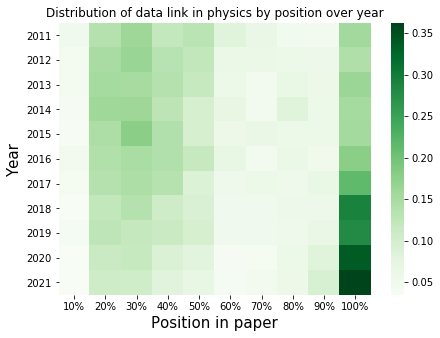

In [37]:
plot_archetype_over_year('physics','Material')

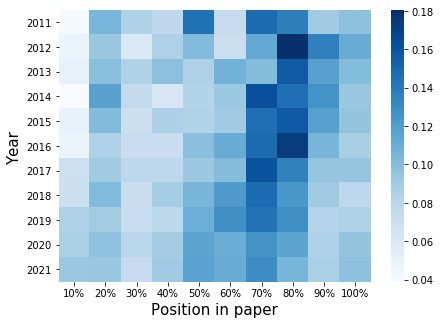

In [16]:
plot_archetype_over_year('cs','Material')

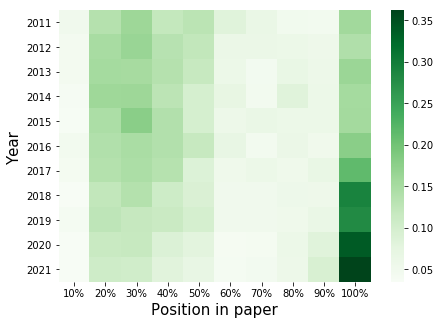

In [17]:
plot_archetype_over_year('physics','Material')

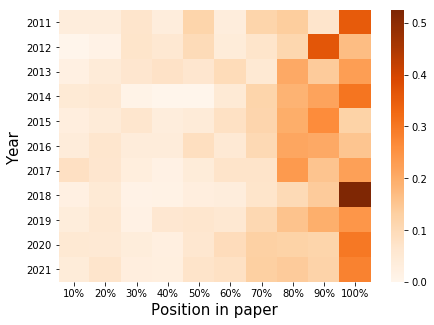

In [18]:
plot_archetype_over_year('math','Material')

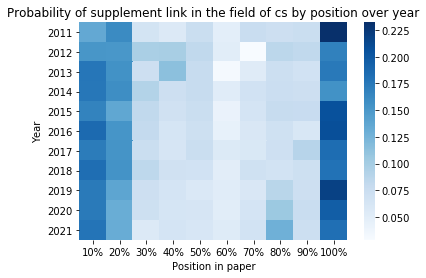

In [69]:
plot_archetype_over_year('cs','Supplement')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

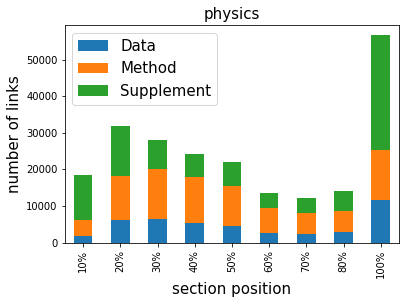

In [105]:
field = 'physics'
df_field = df[df['categories_top_final']==field]
#df_field_pos = df_field[df_field['POS_INDEX']<=500]
temp = df_field.groupby('SECTION_POS_PROPORTION_bin')['label'].value_counts().unstack('label').reset_index()
b= temp.iloc[1].copy()
temp.iloc[9] = b
temp = temp.drop([1])
temp =temp.set_index('SECTION_POS_PROPORTION_bin')
        
    
# , order=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
ax = (temp.plot.bar(stacked=True))
#ax = plt.bar(temp['SECTION_POS_PROPORTION_bin'], temp)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=handles[0:], labels=labels[0:],fontsize = 15)
ax.legend(handles=handles[0:], labels=['Data','Method','Supplement'],fontsize = 15)

plt.title(field,fontsize = 15)
plt.xlabel('section position',fontsize = 15)
plt.ylabel('number of links',fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [395]:
# proportion of cs papers with codes in first 10% over time
df_archetype_cs = df_archetype[df_archetype['categories_top_final']=='cs']
method_beginning = []
total = []
percent = []
Year = []
for year in ['1996-2000','2001-2005', '2006-2010', '2011-2015', '2016-2020','2021-now']:
    try:
        df_temp = df_archetype_cs[df_archetype_cs['year_range']==year]
        method_beginning.append(dict(collections.Counter(map(tuple,df_temp['Method_vec_par'])))[(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)])
        total.append(len(df_temp))
        Year.append(year)
    except:
        pass
 

In [399]:
print (Year)
print (method_beginning)
print (total)
print ([method_beginning[i]/total[i] for i in range(len(total))])

['1996-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2020', '2021-now']
[8, 41, 82, 333, 3045, 2671]
[176, 431, 1336, 7176, 46903, 28061]
[0.045454545454545456, 0.0951276102088167, 0.061377245508982034, 0.04640468227424749, 0.06492122039101976, 0.09518548875663732]


In [402]:
# proportion of cs papers with data in first 10% over time
df_archetype_cs = df_archetype[df_archetype['categories_top_final']=='cs']
method_beginning = []
total = []
percent = []
Year = []
for year in ['1996-2000','2001-2005', '2006-2010', '2011-2015', '2016-2020','2021-now']:
    try:
        df_temp = df_archetype_cs[df_archetype_cs['year_range']==year]
        method_beginning.append(dict(collections.Counter(map(tuple,df_temp['Material_vec_par'])))[(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)])
        total.append(len(df_temp))
        Year.append(year)
    except:
        pass
    
print (Year)
print (method_beginning)
print (total)
print ([method_beginning[i]/total[i] for i in range(len(total))])

['2001-2005', '2006-2010', '2011-2015', '2016-2020', '2021-now']
[2, 12, 101, 980, 611]
[431, 1336, 7176, 46903, 28061]
[0.004640371229698376, 0.008982035928143712, 0.01407469342251951, 0.020894185872971878, 0.021773992373757173]


# concentration of link over time

In [38]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [39]:
def return_gini_field(field, col = 'domain', freq_threshold = 100):
    #field = 'physics'
    df_temp = df[df['categories_top_final']==field]
    Year = []
    Gini = []

    for year in np.sort(list(set(df_temp['year']))):
        df_temp0 = df_temp[df_temp['year']==year]
        if len(df_temp0)>freq_threshold:
            Year.append(year)
            freq_dict = collections.Counter(df_temp0[col]).most_common()
            frequency = [k[1] for k in freq_dict]
            Gini.append(gini(frequency))
    
    return Year, Gini

In [41]:
def return_gini_field_label(field, label,col = 'domain', freq_threshold = 100):
    #field = 'physics'
    df_temp = df[df['categories_top_final']==field]
    df_temp = df_temp[df_temp['label']==label]
    Year = []
    Gini = []

    for year in np.sort(list(set(df_temp['year']))):
        df_temp0 = df_temp[df_temp['year']==year]
        if len(df_temp0)>freq_threshold:
            Year.append(year)
            freq_dict = collections.Counter(df_temp0[col]).most_common()
            frequency = [k[1] for k in freq_dict]
            Gini.append(gini(frequency))
    
    return Year, Gini

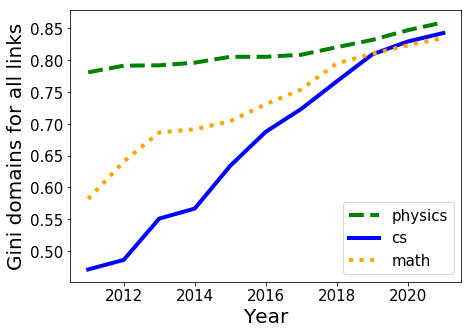

In [148]:
plt.figure(figsize = (7,5))
for field in set(df['categories_top_final']):
    Year, Gini = return_gini_field(field)

    if field == 'cs':
        plt.plot(Year, Gini, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, Gini, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, Gini, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Gini coefficient of domain for all links ' + 'over time' , fontsize = 20)
plt.ylabel('Gini domains for all links', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

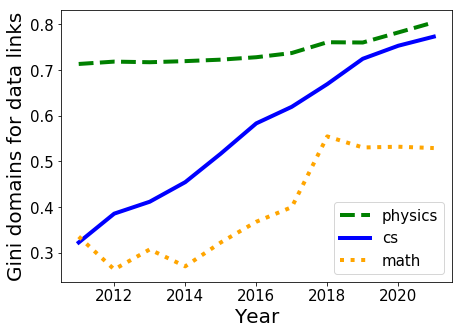

In [149]:
plt.figure(figsize = (7,5))
label = 'Material'
for field in set(df['categories_top_final']):
    Year, Gini = return_gini_field_label(field, label)

    if field == 'cs':
        plt.plot(Year, Gini, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, Gini, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, Gini, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Gini coefficient of domain in data URLs ' + 'over time' , fontsize = 20)
plt.ylabel('Gini domains for data links', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

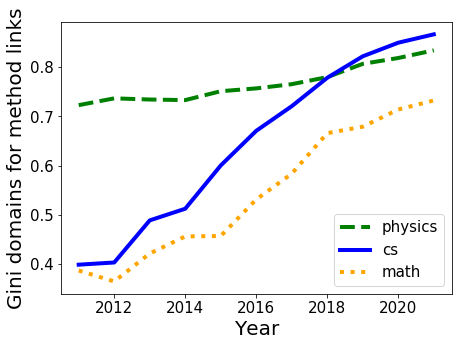

In [150]:
plt.figure(figsize = (7,5))
label = 'Method'
for field in set(df['categories_top_final']):
    Year, Gini = return_gini_field_label(field, label)

    if field == 'cs':
        plt.plot(Year, Gini, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, Gini, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, Gini, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Gini coefficient of domain in method URLs ' + 'over time' , fontsize = 20)
plt.ylabel('Gini domains for method links', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

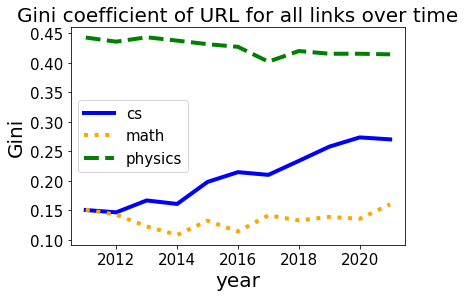

In [190]:
for field in set(df['categories_top_final']):
    Year, Gini = return_gini_field(field, col='URLS_reextracted_normalized_stripped')
    
    if field == 'cs':
        plt.plot(Year, Gini, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, Gini, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, Gini, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)

    
plt.legend(fontsize = 15)

plt.title('Gini coefficient of URL for all links ' + 'over time', fontsize = 20)
plt.ylabel('Gini', fontsize = 20)
plt.xlabel('year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# link retrieval status over time

In [22]:
# studyng the percentage of code for different fields
def return_http_stat(field, code, freq_threshold = 100):
    #field = 'physics'
    df_temp = df[df['categories_top_final']==field]
    Year = []
    URL_code_num = []
    URL_in_total_num = []
    for year in set(df_temp['year']):
        df_temp0 = df_temp[df_temp['year']==year]
        if len(df_temp0)>freq_threshold:
            Year.append(year)
            URL_in_total_num.append(len(df_temp0))
            URL_code_num.append(len(df_temp0[df_temp0['http_code']==code]))
    
    URL_code_percentage = [URL_code_num[i]/URL_in_total_num[i] for i in range(len(URL_code_num))]
    return Year, URL_code_num, URL_in_total_num, URL_code_percentage

In [23]:
def return_http_stat1(df_input, field, code, freq_threshold = 100):
    #field = 'physics'
    df_temp = df_input[df_input['categories_top_final']==field]
    Year = []
    URL_code_num = []
    URL_in_total_num = []
    for year in set(df_temp['year']):
        df_temp0 = df_temp[df_temp['year']==year]
        if len(df_temp0)>freq_threshold:
            Year.append(year)
            URL_in_total_num.append(len(df_temp0))
            URL_code_num.append(len(df_temp0[df_temp0['http_code']==code]))
    
    URL_code_percentage = [URL_code_num[i]/URL_in_total_num[i] for i in range(len(URL_code_num))]
    return Year, URL_code_num, URL_in_total_num, URL_code_percentage

In [24]:
def return_http_stat_artifact(field, code, artifact_type, freq_threshold = 100):
    #field = 'physics'
    df_temp = df[df['categories_top_final']==field]
    df_temp = df_temp[df_temp['label']==artifact_type]
    Year = []
    URL_code_num = []
    URL_in_total_num = []
    for year in set(df_temp['year']):
        df_temp0 = df_temp[df_temp['year']==year]
        if len(df_temp0)>freq_threshold:
            Year.append(year)
            URL_in_total_num.append(len(df_temp0))
            URL_code_num.append(len(df_temp0[df_temp0['http_code']==code]))
    
    URL_code_percentage = [URL_code_num[i]/URL_in_total_num[i] for i in range(len(URL_code_num))]
    return Year, URL_code_num, URL_in_total_num, URL_code_percentage

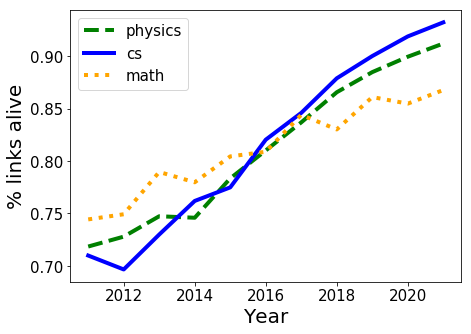

In [155]:
plt.figure(figsize = (7,5))
code = '200'
for field in set(df['categories_top_final']):
    Year, URL_code_num, URL_in_total_num, URL_code_percentage = return_http_stat(field, code)
    Year, URL_code_percentage = zip(*sorted(zip(Year, URL_code_percentage)))

    #plt.plot(Year, URL_code_percentage, label=field)
    if field == 'cs':
        plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Percentage of ' + code +' code over time', fontsize = 20)
plt.ylabel('% links alive', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [30]:
collections.Counter(df['http_code']).most_common()

[('200', 512658),
 ('404', 34981),
 ("<class 'requests.exceptions.ConnectionError'>", 17315),
 ("<class 'requests.exceptions.SSLError'>", 9150),
 ('403', 7952),
 ("<class 'requests.exceptions.ConnectTimeout'>", 6893),
 ('503', 3582),
 ('429', 2017),
 ("<class 'requests.exceptions.ReadTimeout'>", 1579),
 ('500', 699),
 ('401', 315),
 ('400', 261),
 ('502', 242),
 ('410', 217),
 ("<class 'requests.exceptions.TooManyRedirects'>", 128),
 ('202', 98),
 ('504', 96),
 ("<class 'requests.exceptions.MissingSchema'>", 43),
 ('406', 39),
 ("<class 'requests.exceptions.InvalidURL'>", 34),
 ('999', 30),
 ('409', 26),
 ('412', 25),
 ('300', 22),
 ('522', 21),
 ('523', 20),
 ("<class 'urllib3.exceptions.LocationParseError'>", 19),
 ('521', 19),
 ("<class 'requests.exceptions.ContentDecodingError'>", 13),
 ('301', 13),
 ('302', 8),
 ('520', 8),
 ("<class 'requests.exceptions.InvalidSchema'>", 7),
 ('525', 6),
 ('526', 5),
 ('418', 5),
 ('204', 4),
 ("<class 'requests.exceptions.ChunkedEncodingError'>"

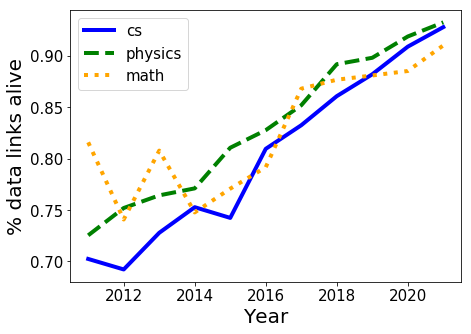

In [25]:
plt.figure(figsize = (7,5))
code = '200'
artifact_type = 'Material'
for field in set(df['categories_top_final']):
    Year, URL_code_num, URL_in_total_num, URL_code_percentage = return_http_stat_artifact(field, code, artifact_type)
    Year, URL_code_percentage = zip(*sorted(zip(Year, URL_code_percentage)))

    #plt.plot(Year, URL_code_percentage, label=field)
    if field == 'cs':
        plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Percentage of ' + code +' code over time', fontsize = 20)
plt.ylabel('% data links alive', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

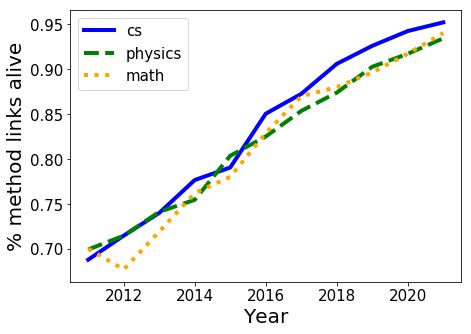

In [27]:
plt.figure(figsize = (7,5))
code = '200'
artifact_type = 'Method'
for field in set(df['categories_top_final']):
    Year, URL_code_num, URL_in_total_num, URL_code_percentage = return_http_stat_artifact(field, code, artifact_type)
    Year, URL_code_percentage = zip(*sorted(zip(Year, URL_code_percentage)))

    #plt.plot(Year, URL_code_percentage, label=field)
    if field == 'cs':
        plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Percentage of ' + code +' code over time', fontsize = 20)
plt.ylabel('% method links alive', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# link type over time

In [133]:
# studyng the percentage of code for different fields
def return_artifact_type_stat(field, code, freq_threshold = 100):
    #field = 'physics'
    df_temp = df[df['categories_top_final']==field]
    Year = []
    URL_code_num = []
    URL_in_total_num = []
    for year in set(df_temp['year']):
        df_temp0 = df_temp[df_temp['year']==year]
        if len(df_temp0)>freq_threshold:
            Year.append(year)
            URL_in_total_num.append(len(df_temp0))
            URL_code_num.append(len(df_temp0[df_temp0['label']==code]))
    
    URL_code_percentage = [URL_code_num[i]/URL_in_total_num[i] for i in range(len(URL_code_num))]
    return Year, URL_code_num, URL_in_total_num, URL_code_percentage

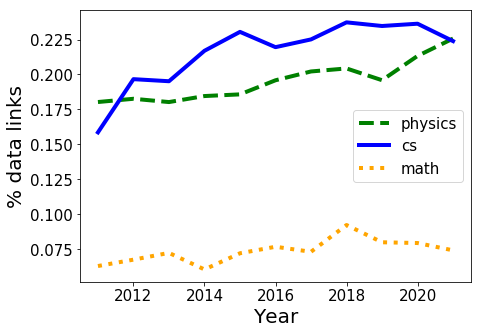

In [138]:
plt.figure(figsize = (7,5))
code = 'Material'
for field in set(df['categories_top_final']):
    Year, URL_code_num, URL_in_total_num, URL_code_percentage = return_artifact_type_stat(field, code)
    Year, URL_code_percentage = zip(*sorted(zip(Year, URL_code_percentage)))

    #plt.plot(Year, URL_code_percentage, label=field)
    if field == 'cs':
        plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Proportion of all URLs that are data artifact', fontsize = 20)
plt.ylabel('% data links', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()



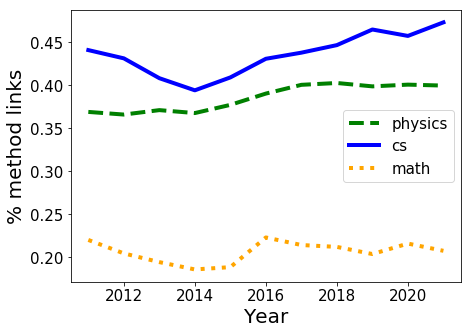

In [139]:
plt.figure(figsize = (7,5))
code = 'Method'
for field in set(df['categories_top_final']):
    Year, URL_code_num, URL_in_total_num, URL_code_percentage = return_artifact_type_stat(field, code)
    Year, URL_code_percentage = zip(*sorted(zip(Year, URL_code_percentage)))

    #plt.plot(Year, URL_code_percentage, label=field)
    if field == 'cs':
        plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Proportion of all URLs that are ' + code.lower() +' artifact', fontsize = 20)
plt.ylabel('% method links', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

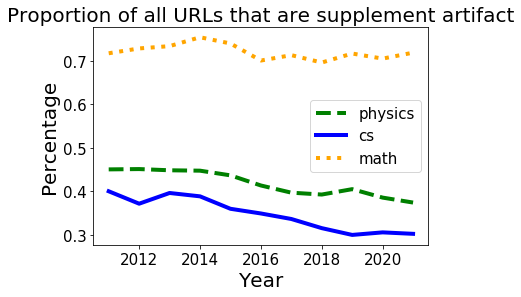

In [136]:
code = 'Supplement'
for field in set(df['categories_top_final']):
    Year, URL_code_num, URL_in_total_num, URL_code_percentage = return_artifact_type_stat(field, code)
    Year, URL_code_percentage = zip(*sorted(zip(Year, URL_code_percentage)))

    #plt.plot(Year, URL_code_percentage, label=field)
    if field == 'cs':
        plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    if field == 'physics':
        plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    if field == 'math':
        plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(fontsize = 15)

#plt.title('Proportion of all URLs that are ' + code.lower() +' artifact', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [168]:
# top domains in material
# plot total number of records
def plot_most_frequent_key_record_num(df_input, field, col, label, top=10, width=15, height = 7):
    df_temp0 = df_input[df_input['categories_top_final']==field]
    df_table = pd.DataFrame()
    for year in ['1991-1995','1996-2000','2001-2005','2006-2010','2011-2015','2016-2020','2021-now']:
        #print (year)
        df_temp_year = df_temp0[df_temp0['year_range']==year]
        #print (df_temp_year)
        top_list = collections.Counter(df_temp_year[col]).most_common(top)
        key = [i[0] for i in  top_list]
        freq = [i[1] for i in  top_list]
        year_key = year + ' (' + str(len(df_temp_year)) + ')'
        if len(key)==top:
            #year_key = year
            df_table[year_key] = key
            df_table[year_key] += ' ('
            df_table[year_key] += list(map(str,freq))
            df_table[year_key] += ')'
        else:
            df_table[year_key] = key+['NA']*(top-len(key))
            df_table[year_key] += ' ('
            df_table[year_key] += list(map(str,freq))+['']*(top-len(key))
            df_table[year_key] += ')'
    #return df_table

    fig, ax = plt.subplots(figsize=(width, height))
    #fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    ax.table(cellText=df_table.values, colLabels=df_table.columns, loc='center')
    fig.subplots_adjust(top=0.95)
    plt.title('Artifact type: ' + str(label) + ' ' + str(field) + ' top '+ str(top) +' '+str(col ) + ' record #')
    #ax.set_title(str(field) + ' top '+ str(top) +' '+str(col )+ ' record #', pad=20)
    #fig.tight_layout()
    plt.show()

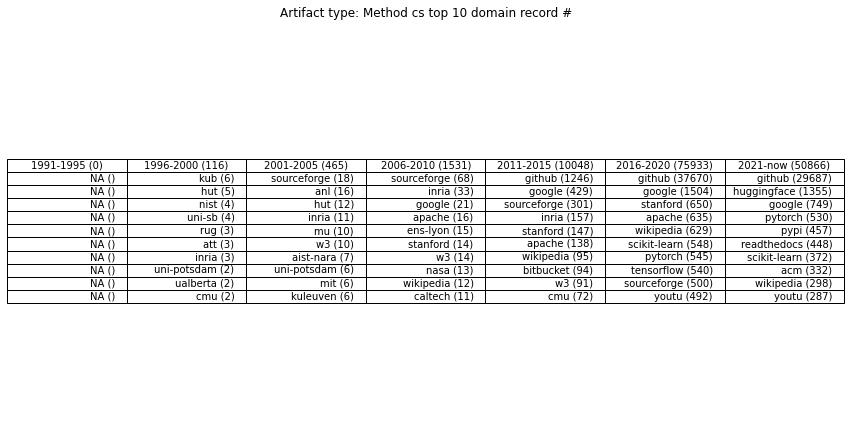

In [164]:
label = 'Method'
df_input = df[df['label']==label]
top = 10
#col='URLS_reextracted_normalized_stripped'
col='domain'
plot_most_frequent_key_record_num(df_input, 'cs', col, label, top=10)


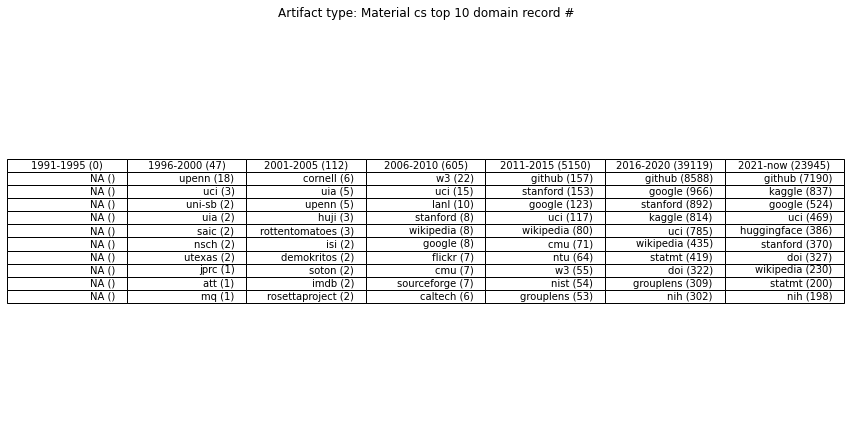

In [163]:
label = 'Material'
df_input = df[df['label']==label]
top = 10
#col='URLS_reextracted_normalized_stripped'
col='domain'
plot_most_frequent_key_record_num(df_input, 'cs', col, label, top=10)

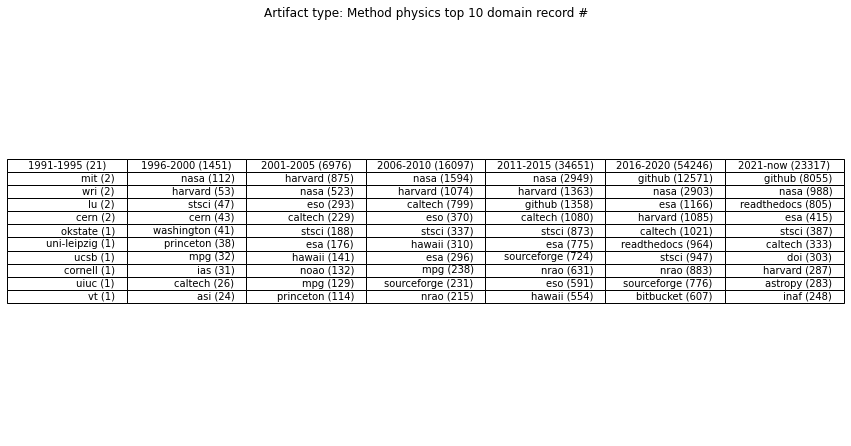

In [165]:
label = 'Method'
df_input = df[df['label']==label]
top = 10
#col='URLS_reextracted_normalized_stripped'
col='domain'
plot_most_frequent_key_record_num(df_input, 'physics', col, label, top=10)


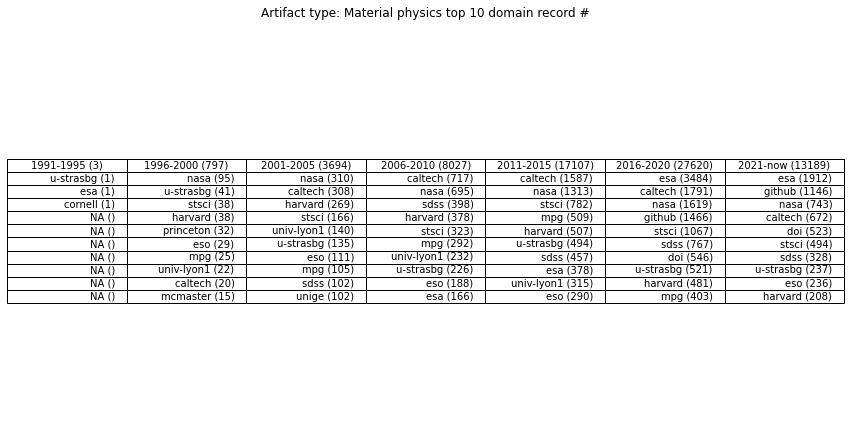

In [166]:
label = 'Material'
df_input = df[df['label']==label]
top = 10
#col='URLS_reextracted_normalized_stripped'
col='domain'
plot_most_frequent_key_record_num(df_input, 'physics', col, label, top=10)


# popularity of links and domains 

In [47]:
# popularity vs. percentage of 200
df_count_url = df.groupby('URLS_reextracted_normalized').aggregate('count').reset_index()[['URLS_reextracted_normalized','PAPER_ID']].rename(columns={'PAPER_ID': 'URL_count'})

In [49]:
df_count_domain = df.groupby('domain').aggregate('count').reset_index()[['domain','PAPER_ID']].rename(columns={'PAPER_ID': 'domain_count'})

In [13]:
percentile = [0.01,0.05,0.1,0.2]
freq_sort = list(df_count_domain.sort_values(by = 'domain_count', ascending=False)['domain_count'])
for p in percentile:
    print('**')
    print ('top '+ str(p))
    print (freq_sort[int(np.round(p*len(freq_sort)))])

**
top 0.01
187
**
top 0.05
24
**
top 0.1
10
**
top 0.2
4


In [94]:
# get top 20 domain
np.sum(df_count_domain['domain_count'])

754689

# relationship between link popularity and link retrieval status

In [15]:
df_stat = df
df_stat['IsStatus200'] = (df_stat['http_code']=='200').astype('int')
df_stat = df_stat.merge(df_count_url, on = 'URLS_reextracted_normalized', how = 'inner')
df_stat = df_stat.merge(df_count_domain, on = 'domain', how = 'inner')


In [16]:
df_stat

,Unnamed: 0,Unnamed: 0.1,PAPER_ID,SEC_INDEX,POS_INDEX,SECTION,IsFOOTNOTE,FOOTNOTE,CONTEXT,CONTEXT_PAR,...,PAR_TOTAL_LENGTH,PAR_INDEX,PAR_POS_PROPORTION,PAR_POS_PROPORTION_bin,SECTION_POS_PROPORTION_bin,title,n_citations,IsStatus200,URL_count,domain_count
0,61,109799,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,1,10,450
1,62,109800,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,1,10,450
2,63,116590,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1,10,450
3,64,116591,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1,10,450
4,65,117764,1207.3836,body_text,4,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,It was followed up photometrically by VSNET FO...,"In this paper, we present optical spectroscopy...",...,47.0,13.0,0.276596,30%,20%,CSS100603:112253−111037: a helium-rich dwarf n...,35.0,1,10,450
5,66,185828,1409.939,body_text,7,Observations and data analysis,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,In order to assess when the low and high optic...,In order to assess when the low and high optic...,...,64.0,19.0,0.296875,30%,20%,X-Ray Observations of VY Scl-Type Nova-Like Bi...,14.0,1,10,450
6,67,189519,1407.1907,body_text,23,Notes on individual objects::AM CVn systems an...,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,An outburst spectrum of CRTS J102842.9-081927 ...,There are several other AM CVn candidates and ...,...,121.0,36.0,0.297521,30%,30%,1000 cataclysmic variables from the catalina r...,62.0,1,10,450
7,68,212384,1506.8526,body_text,1,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,VSNET alert-news FOOTREF2 reported on the dete...,P. Berardi (cf. TOCP) on Oct 30.8 UT and Santa...,...,37.0,8.0,0.216216,30%,30%,"Outburst evolution, historic light curve and a...",0.0,1,10,450
8,69,213305,1502.14,body_text,5,Introduction Introduction,1,"VSNET, at http://www.kusastro.kyoto-u.ac.jp/vs...",MLS110213 is included in the RK catalogue base...,"As of June 2014 FOOTREF5 , 114 polars have bee...",...,65.0,14.0,0.215385,30%,20%,MLS110213:022733+130617: A new eclipsing polar...,6.0,1,10,450
9,70,341762,1802.6659,body_text,7,Observations of a bright microlensing event,1,See and http://www.kusastro.kyoto-u.ac.jp/vsnet/,Following a VSNET (Variable Star Network FOOTR...,Following a VSNET (Variable Star Network FOOTR...,...,58.0,20.0,0.344828,40%,50%,Discovery of a bright microlensing event with ...,15.0,1,10,450


In [106]:
df_stat.drop('Unnamed: 0', axis=1).to_csv('200code_regression_table.tsv',sep='\t')

In [17]:
#import statsmodels.api as sm
import statsmodels.formula.api as smf


In [18]:
df_stat['age'] = 2022-df_stat['year']
df_stat['age_squared'] = df_stat['age']*df_stat['age']

In [19]:
df_stat

,Unnamed: 0,Unnamed: 0.1,PAPER_ID,SEC_INDEX,POS_INDEX,SECTION,IsFOOTNOTE,FOOTNOTE,CONTEXT,CONTEXT_PAR,...,PAR_POS_PROPORTION,PAR_POS_PROPORTION_bin,SECTION_POS_PROPORTION_bin,title,n_citations,IsStatus200,URL_count,domain_count,age,age_squared
0,61,109799,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,1,10,450,10,100
1,62,109800,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,1,10,450,10,100
2,63,116590,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1,10,450,10,100
3,64,116591,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1,10,450,10,100
4,65,117764,1207.3836,body_text,4,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,It was followed up photometrically by VSNET FO...,"In this paper, we present optical spectroscopy...",...,0.276596,30%,20%,CSS100603:112253−111037: a helium-rich dwarf n...,35.0,1,10,450,10,100
5,66,185828,1409.939,body_text,7,Observations and data analysis,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,In order to assess when the low and high optic...,In order to assess when the low and high optic...,...,0.296875,30%,20%,X-Ray Observations of VY Scl-Type Nova-Like Bi...,14.0,1,10,450,8,64
6,67,189519,1407.1907,body_text,23,Notes on individual objects::AM CVn systems an...,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,An outburst spectrum of CRTS J102842.9-081927 ...,There are several other AM CVn candidates and ...,...,0.297521,30%,30%,1000 cataclysmic variables from the catalina r...,62.0,1,10,450,8,64
7,68,212384,1506.8526,body_text,1,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,VSNET alert-news FOOTREF2 reported on the dete...,P. Berardi (cf. TOCP) on Oct 30.8 UT and Santa...,...,0.216216,30%,30%,"Outburst evolution, historic light curve and a...",0.0,1,10,450,7,49
8,69,213305,1502.14,body_text,5,Introduction Introduction,1,"VSNET, at http://www.kusastro.kyoto-u.ac.jp/vs...",MLS110213 is included in the RK catalogue base...,"As of June 2014 FOOTREF5 , 114 polars have bee...",...,0.215385,30%,20%,MLS110213:022733+130617: A new eclipsing polar...,6.0,1,10,450,7,49
9,70,341762,1802.6659,body_text,7,Observations of a bright microlensing event,1,See and http://www.kusastro.kyoto-u.ac.jp/vsnet/,Following a VSNET (Variable Star Network FOOTR...,Following a VSNET (Variable Star Network FOOTR...,...,0.344828,40%,50%,Discovery of a bright microlensing event with ...,15.0,1,10,450,4,16


In [22]:
df_stat['log_domain_count'] = np.log(df_stat['domain_count'])
df_stat['log_URL_count'] = np.log(df_stat['URL_count'])
df_stat['log_n_citations'] = np.log(df_stat['n_citations']+1)

In [23]:
df_stat

,Unnamed: 0,Unnamed: 0.1,PAPER_ID,SEC_INDEX,POS_INDEX,SECTION,IsFOOTNOTE,FOOTNOTE,CONTEXT,CONTEXT_PAR,...,title,n_citations,IsStatus200,URL_count,domain_count,age,age_squared,log_domain_count,log_URL_count,log_n_citations
0,61,109799,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,Coulomb drag in graphene-boron nitride heteros...,11.0,1,10,450,10,100,6.109248,2.302585,2.484907
1,62,109800,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,Coulomb drag in graphene-boron nitride heteros...,11.0,1,10,450,10,100,6.109248,2.302585,2.484907
2,63,116590,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1,10,450,10,100,6.109248,2.302585,1.609438
3,64,116591,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1,10,450,10,100,6.109248,2.302585,1.609438
4,65,117764,1207.3836,body_text,4,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,It was followed up photometrically by VSNET FO...,"In this paper, we present optical spectroscopy...",...,CSS100603:112253−111037: a helium-rich dwarf n...,35.0,1,10,450,10,100,6.109248,2.302585,3.583519
5,66,185828,1409.939,body_text,7,Observations and data analysis,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,In order to assess when the low and high optic...,In order to assess when the low and high optic...,...,X-Ray Observations of VY Scl-Type Nova-Like Bi...,14.0,1,10,450,8,64,6.109248,2.302585,2.708050
6,67,189519,1407.1907,body_text,23,Notes on individual objects::AM CVn systems an...,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,An outburst spectrum of CRTS J102842.9-081927 ...,There are several other AM CVn candidates and ...,...,1000 cataclysmic variables from the catalina r...,62.0,1,10,450,8,64,6.109248,2.302585,4.143135
7,68,212384,1506.8526,body_text,1,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,VSNET alert-news FOOTREF2 reported on the dete...,P. Berardi (cf. TOCP) on Oct 30.8 UT and Santa...,...,"Outburst evolution, historic light curve and a...",0.0,1,10,450,7,49,6.109248,2.302585,0.000000
8,69,213305,1502.14,body_text,5,Introduction Introduction,1,"VSNET, at http://www.kusastro.kyoto-u.ac.jp/vs...",MLS110213 is included in the RK catalogue base...,"As of June 2014 FOOTREF5 , 114 polars have bee...",...,MLS110213:022733+130617: A new eclipsing polar...,6.0,1,10,450,7,49,6.109248,2.302585,1.945910
9,70,341762,1802.6659,body_text,7,Observations of a bright microlensing event,1,See and http://www.kusastro.kyoto-u.ac.jp/vsnet/,Following a VSNET (Variable Star Network FOOTR...,Following a VSNET (Variable Star Network FOOTR...,...,Discovery of a bright microlensing event with ...,15.0,1,10,450,4,16,6.109248,2.302585,2.772589


In [149]:
# the domain popularity at certain percentile
percentile = [0.01,0.05,0.1,0.2]
freq_sort = list(df_count_domain.sort_values(by = 'domain_count', ascending=False)['domain_count'])
for p in percentile:
    print('**')
    print ('top '+ str(p) + ' most popular domain frequency')
    print (freq_sort[int(np.round(p*len(freq_sort)))])

**
top 0.01 most popular domain frequency
206
**
top 0.05 most popular domain frequency
26
**
top 0.1 most popular domain frequency
10
**
top 0.2 most popular domain frequency
4


In [24]:
#log transform the variable

log_reg = smf.logit("IsStatus200 ~ log_domain_count + log_URL_count + IsFOOTNOTE + log_n_citations +  C(categories_top_final, Treatment(reference='math')) + C(label, Treatment(reference='Supplement'))+age + age_squared", data=df_stat).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.375090
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            IsStatus200   No. Observations:               592947
Model:                          Logit   Df Residuals:                   592936
Method:                           MLE   Df Model:                           10
Date:                Sat, 01 Apr 2023   Pseudo R-squ.:                 0.08786
Time:                        21:38:37   Log-Likelihood:            -2.2241e+05
converged:                       True   LL-Null:                   -2.4383e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           1.4124      0.019     75.160      0.000       1.376       1.449
C(categories_top_final, Treatment(reference='math'))[T.cs]          0.2159      0.014     15.787      0.000       0.189       0.243
C(categories_top_final, Treatment(reference='math'))[T.physics]    -0.2508      0.013    -19.245      0.000      -0.276      -0.225
C(label, Treatment(reference='Supplement'))[T.Material]             0.0159      0.011      1.454      0.146      -0.006       0.037
C(label, Treatment(reference='Supplement'))[T.Method]               0.1683      0.009     18.535      0.000       0.150       0.186
log_domain_count                                                    0.1111      0.001     94.025      0.000       0.109       0.113
log_URL_count                                                       0.2404      0.003     91.282      0.000       0.235       0.246
IsFOOTNOTE                                                          0.2051      0.008     24.457      0.000       0.189       0.221
log_n_citations                                                     0.0163      0.003      5.524      0.000       0.011       0.022
age                                                                -0.2401      0.005    -43.677      0.000      -0.251      -0.229
age_squared                                                         0.0078      0.000     16.863      0.000       0.007       0.009
===================================================================================================================================
"""

In [153]:
# consider domain popularity over a certain threshold as popular domain
Freq_threshold = 206
df_stat['is_popular_domain'] = df_stat['domain_count']>Freq_threshold

In [151]:
#log_reg = smf.logit("IsStatus200 ~ C(year_range) +  C(categories_top_final) + C(label)", data=df_stat).fit()
#log_reg = smf.logit("IsStatus200 ~ URL_count + domain_count + IsFOOTNOTE + n_citations+ C(year) +  C(categories_top_final, Treatment(reference='math')) + C(label, Treatment(reference='Supplement'))", data=df_stat).fit()

log_reg = smf.logit("IsStatus200 ~ URL_count + is_popular_domain + IsFOOTNOTE + n_citations +  C(categories_top_final, Treatment(reference='math')) + C(label, Treatment(reference='Supplement'))", data=df_stat).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.395008
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            IsStatus200   No. Observations:               663314
Model:                          Logit   Df Residuals:                   663305
Method:                           MLE   Df Model:                            8
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                 0.04670
Time:                        01:04:53   Log-Likelihood:            -2.6201e+05
converged:                       True   LL-Null:                   -2.7485e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           1.0230      0.012     88.876      0.000       1.000       1.046
is_popular_domain[T.True]                                           0.6033      0.007     81.119      0.000       0.589       0.618
C(categories_top_final, Treatment(reference='math'))[T.cs]          0.3881      0.013     30.752      0.000       0.363       0.413
C(categories_top_final, Treatment(reference='math'))[T.physics]    -0.3133      0.012    -26.475      0.000      -0.337      -0.290
C(label, Treatment(reference='Supplement'))[T.Material]             0.1584      0.010     15.776      0.000       0.139       0.178
C(label, Treatment(reference='Supplement'))[T.Method]               0.2888      0.008     34.742      0.000       0.273       0.305
URL_count                                                           0.0030   5.72e-05     52.271      0.000       0.003       0.003
IsFOOTNOTE                                                          0.2021      0.008     26.287      0.000       0.187       0.217
n_citations                                                     -4.507e-05   8.56e-06     -5.263      0.000   -6.19e-05   -2.83e-05
===================================================================================================================================
"""

In [155]:
#log_reg = smf.logit("IsStatus200 ~ C(year_range) +  C(categories_top_final) + C(label)", data=df_stat).fit()
#log_reg = smf.logit("IsStatus200 ~ URL_count + domain_count + IsFOOTNOTE + n_citations+ C(year) +  C(categories_top_final, Treatment(reference='math')) + C(label, Treatment(reference='Supplement'))", data=df_stat).fit()

log_reg = smf.logit("IsStatus200 ~ URL_count + domain_count + IsFOOTNOTE + n_citations +  C(categories_top_final, Treatment(reference='math')) + C(label, Treatment(reference='Supplement'))", data=df_stat).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.387590
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            IsStatus200   No. Observations:               663314
Model:                          Logit   Df Residuals:                   663305
Method:                           MLE   Df Model:                            8
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                 0.06460
Time:                        11:40:13   Log-Likelihood:            -2.5709e+05
converged:                       True   LL-Null:                   -2.7485e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           1.2086      0.011    114.020      0.000       1.188       1.229
C(categories_top_final, Treatment(reference='math'))[T.cs]          0.2049      0.013     16.252      0.000       0.180       0.230
C(categories_top_final, Treatment(reference='math'))[T.physics]    -0.2474      0.012    -20.757      0.000      -0.271      -0.224
C(label, Treatment(reference='Supplement'))[T.Material]             0.1429      0.010     14.193      0.000       0.123       0.163
C(label, Treatment(reference='Supplement'))[T.Method]               0.0875      0.008     10.307      0.000       0.071       0.104
URL_count                                                           0.0040   6.41e-05     62.985      0.000       0.004       0.004
domain_count                                                     1.504e-05   1.41e-07    106.930      0.000    1.48e-05    1.53e-05
IsFOOTNOTE                                                          0.2926      0.008     37.488      0.000       0.277       0.308
n_citations                                                     -3.632e-05   8.47e-06     -4.289      0.000   -5.29e-05   -1.97e-05
===================================================================================================================================
"""

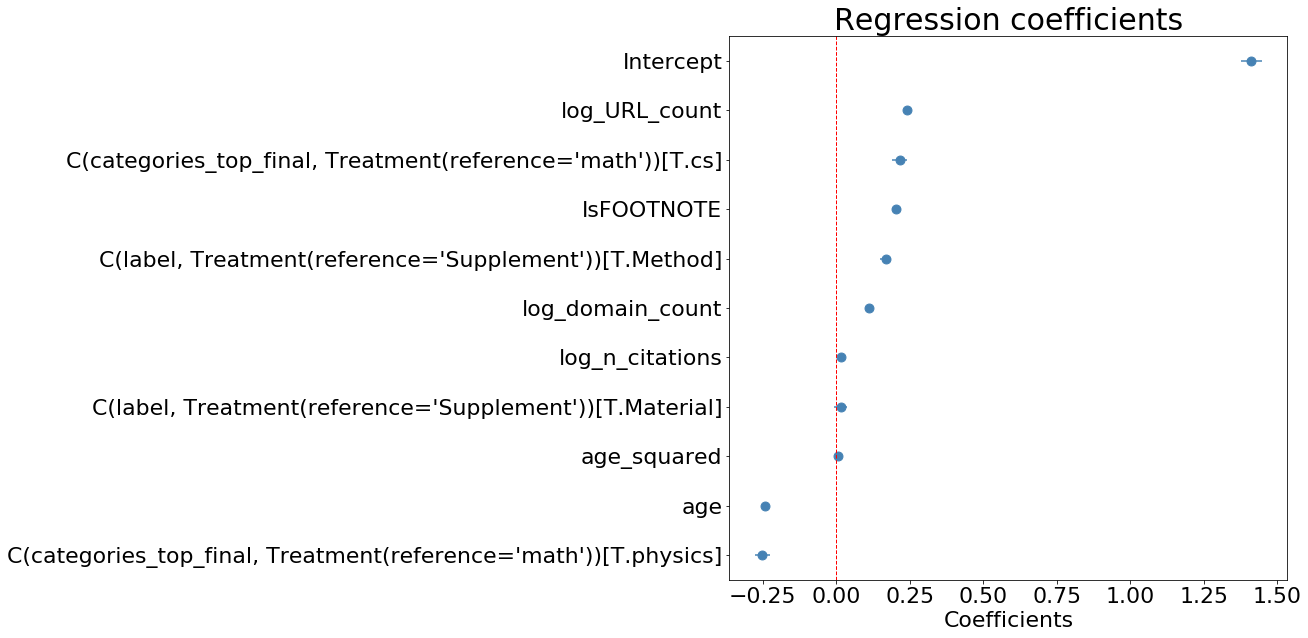

In [25]:
    # Create dataframe of results summary 
    results = log_reg
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    #coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    coef_df = coef_df.replace(['URL_METHOD_DEAD[T.True]'],'Has dead method link')
    #coef_df = coef_df.replace(['URL_MATERIAL_DEAD[T.True]'],'Has dead material link')
    #coef_df = coef_df.replace(['URL_METHOD_LIVE[T.True]'],'Has live method link')
    #coef_df = coef_df.replace(['URL_MATERIAL_LIVE[T.True]'],'Has live material link')
    #coef_df = coef_df[coef_df['variables'].isin(['Has dead material link','Has dead method link','Has live method link','Has live material link'])]

    
    #fig, ax= plt.subplots(figsize=(15, 10))
    fig, ax= plt.subplots(figsize=(10, 10))
    
    coef_df.plot(y='coef',x='variables',  kind='barh',
                  color='none',fontsize=22, 
                 ecolor='steelblue',capsize=0,ax = ax,
                 xerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Regression coefficients',fontsize=30)
    ax.set_xlabel('Coefficients',fontsize=22)
    ax.set_ylabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(y=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               x=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

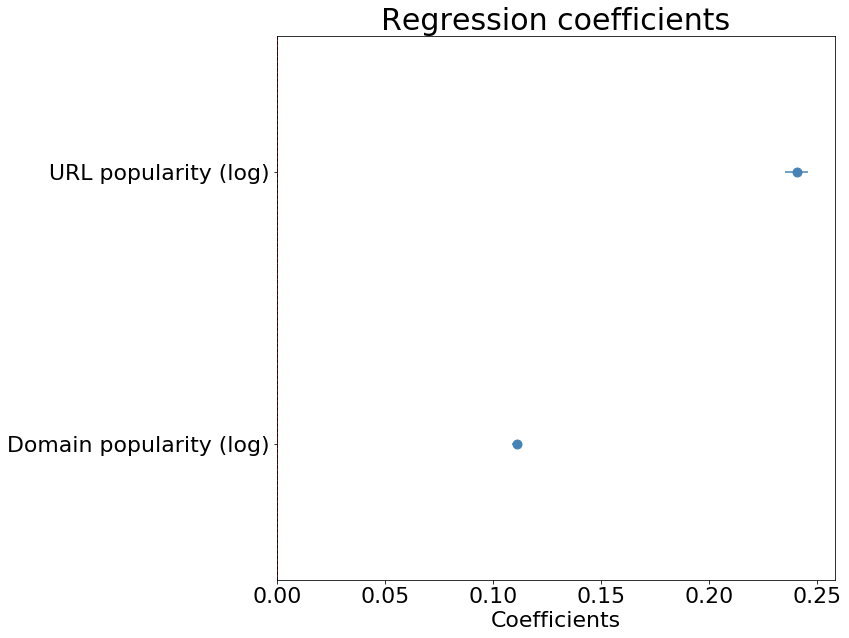

In [26]:
    # Create dataframe of results summary 
    results = log_reg
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    #coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    coef_df = coef_df.replace(['log_URL_count'],'URL popularity (log)')
    coef_df = coef_df.replace(['log_domain_count'],'Domain popularity (log)')

    coef_df = coef_df[coef_df['variables'].isin(['URL popularity (log)','Domain popularity (log)'])]

    
    #fig, ax= plt.subplots(figsize=(15, 10))
    fig, ax= plt.subplots(figsize=(10, 10))
    
    coef_df.plot(y='coef',x='variables',  kind='barh',
                  color='none',fontsize=22, 
                 ecolor='steelblue',capsize=0,ax = ax,
                 xerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Regression coefficients',fontsize=30)
    ax.set_xlabel('Coefficients',fontsize=22)
    ax.set_ylabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(y=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               x=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

In [109]:
df_stat[['IsStatus200','URL_count','IsFOOTNOTE','year_range','categories_top_final','label']].to_csv('200code_regression_table_concise.tsv',sep='\t')

# Relationship between paper citation and link availability/retrieval status

In [40]:
def reformat_paper_id(l):
    l =  str(l).replace('/', '')
    l = l.replace('-', '')
    if '.' in l:
        return '.'.join(str(int(i)) for i in l.split('.'))
    else:
        return l

In [41]:
def get_top_field(l):
    temp = l.split(' ')[0]
    return temp.split('.')[0]

#df_field = pd.read_csv('/net/s3/s2-research/hanchengc/arxiv_meta_data/arxiv_paper_field.tsv', sep='\t').drop_duplicates()
df_field = pd.read_csv('/dfs/scratch0/hanchcao/ai2/hanchengs-internship-project-main/data/arxiv_paper_field.tsv', sep='\t').drop_duplicates()
df_field['categories_top'] = df_field['categories'].apply(get_top_field)
df_field['PAPER_ID'] = df_field['PAPER_ID'].astype('str')
df_field['PAPER_ID'] = df_field['PAPER_ID'].apply(reformat_paper_id)
df_field = df_field.drop_duplicates()

category_map = [('math', 'math'),
 ('cs', 'cs'),
 ('cond-mat', 'physics'),
 ('astro-ph', 'physics'),
 ('physics', 'physics'),
 ('hep-ph', 'physics'),
 ('hep-th', 'physics'),
 ('quant-ph', 'physics'),
 ('gr-qc', 'physics'),
 ('stat', 'stat'),
 ('eess', 'eess'),
 ('nucl-th', 'physics'),
 ('math-ph', 'physics'),
 ('q-bio', 'q-bio'),
 ('hep-ex', 'physics'),
 ('nlin', 'physics'),
 ('hep-lat', 'physics'),
 ('nucl-ex', 'physics'),
 ('q-fin', 'q-fin'),
 ('econ', 'econ'),
 ('chao-dyn', 'physics'),
 ('alg-geom', 'math'),
 ('q-alg', 'math'),
 ('cmp-lg', 'cs'),
 ('solv-int', 'physics'),
 ('dg-ga', 'math'),
 ('patt-sol', 'physics'),
 ('funct-an', 'math'),
 ('adap-org', 'physics'),
 ('mtrl-th', 'physics'),
 ('comp-gas', 'physics'),
 ('chem-ph', 'physics'),
 ('supr-con', 'physics'),
 ('atom-ph', 'physics'),
 ('acc-phys', 'physics'),
 ('plasm-ph', 'physics'),
 ('ao-sci', 'physics'),
 ('bayes-an', 'physics')]

category_map_dict = {}
for unit in category_map:
    category_map_dict[unit[0]] = unit[1]
    
df_field['categories_top_final']  = df_field['categories_top'].map(category_map_dict)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
df_citation = pd.read_csv('arxiv-papers-2022-10-03.csv000')

In [42]:
df_citation['arxiv_id'] = df_citation['arxiv_id'].apply(reformat_paper_id)
df_citation = df_citation[['title','year','arxiv_id','n_citations']]
df_citation = df_citation.rename(columns={"arxiv_id": "PAPER_ID"})
df_citation = df_citation.dropna()
df_citation['PAPER_ID'] = df_citation['PAPER_ID'].astype('str')
df_citation 

,title,year,PAPER_ID,n_citations
0,Distributed Algorithms in Multihop Broadcast N...,1999,cs9909011,0.0
1,A New Look at the Easy-Hard-Easy Pattern of Co...,1997,cs9707101,47.0
2,Deterministic boundary recognition and topolog...,2006,cs0510048,208.0
3,Coordination of Decisions in a Spatial Agent M...,2001,condmat0109121,51.0
4,On Outage Behavior of Wideband Slow-Fading Cha...,2007,711.4557,5.0
5,Commitment Capacity of Discrete Memoryless Cha...,2003,cs0304014,76.0
6,Integrating selectional preferences in WordNet,2002,cs0204027,57.0
7,Abstract State Machines 1988-1998: Commented A...,1998,cs9811014,58.0
8,Coexistence of Social Norms Based on in- and O...,2007,708.4155,17.0
9,Efficient Algorithms for Parsing the DOP Model,1996,cmplg9604008,89.0


In [68]:
#df.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID']].rename(columns={'PAPER_ID': 'URL_count'})
df_paper_link = df.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_count'})
df_paper_link = df_paper_link[['PAPER_ID','URL_count']]
df_paper_link['PAPER_ID'] =df_paper_link['PAPER_ID'].astype('str')

In [69]:
df_paper_link = df_paper_link.drop_duplicates()

In [70]:
df_citation_count = df_citation.merge(df_paper_link, on = 'PAPER_ID', how='left')
df_citation_count = df_citation_count.fillna(0)

In [71]:
df_citation_count = df_citation_count[df_citation_count['year']>1990]
df_citation_count = df_citation_count[df_citation_count['year']<2023]

In [72]:
df_citation_count = df_citation_count.merge(df_field, on = 'PAPER_ID', how='inner')

In [73]:
df_citation_count

,title,year,PAPER_ID,n_citations,URL_count,categories,categories_top,categories_top_final
0,Distributed Algorithms in Multihop Broadcast N...,1999,cs9909011,0.0,0.0,cs.DC cs.NI,cs,cs
1,A New Look at the Easy-Hard-Easy Pattern of Co...,1997,cs9707101,47.0,0.0,cs.AI,cs,cs
2,Deterministic boundary recognition and topolog...,2006,cs0510048,208.0,0.0,cs.DC cs.CG,cs,cs
3,Coordination of Decisions in a Spatial Agent M...,2001,condmat0109121,51.0,0.0,cond-mat.stat-mech cs.MA,cond-mat,physics
4,On Outage Behavior of Wideband Slow-Fading Cha...,2007,711.4557,5.0,0.0,cs.IT math.IT,cs,cs
5,Commitment Capacity of Discrete Memoryless Cha...,2003,cs0304014,76.0,0.0,cs.CR quant-ph,cs,cs
6,Integrating selectional preferences in WordNet,2002,cs0204027,57.0,0.0,cs.CL,cs,cs
7,Abstract State Machines 1988-1998: Commented A...,1998,cs9811014,58.0,0.0,cs.SE,cs,cs
8,Coexistence of Social Norms Based on in- and O...,2007,708.4155,17.0,0.0,nlin.AO cs.MA physics.soc-ph,nlin,physics
9,Efficient Algorithms for Parsing the DOP Model,1996,cmplg9604008,89.0,0.0,cmp-lg cs.CL,cmp-lg,cs


In [74]:
df_citation_count['HasURL'] = df_citation_count['URL_count']>0

In [75]:
# original regression - df_citation_count reflects whether a paper has URL and its number of citations
df_citation_count = df_citation_count[df_citation_count['year']>=2011]
df_citation_count = df_citation_count[df_citation_count['year']<=2021]

df_citation_count = df_citation_count[df_citation_count['categories_top_final'].isin(['cs','physics','math'])]

In [76]:
### aditional analysis combining different categories of links, live/dead material/method
df_temp = df[df['label']=='Method']
df_temp = df_temp[df_temp['http_code']=='200']
df_paper_link_method_live = df_temp.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_METHOD_LIVE_count'})
df_paper_link_method_live = df_paper_link_method_live[['PAPER_ID','URL_METHOD_LIVE_count']]
df_paper_link_method_live['PAPER_ID'] = df_paper_link_method_live['PAPER_ID'].astype('str')

df_temp = df[df['label']=='Material']
df_temp = df_temp[df_temp['http_code']=='200']
df_paper_link_material_live = df_temp.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_MATERIAL_LIVE_count'})
df_paper_link_material_live = df_paper_link_material_live[['PAPER_ID','URL_MATERIAL_LIVE_count']]
df_paper_link_material_live['PAPER_ID'] = df_paper_link_material_live['PAPER_ID'].astype('str')

df_temp = df[df['label']=='Method']
df_temp = df_temp[df_temp['http_code']!='200']
df_paper_link_method_dead = df_temp.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_METHOD_DEAD_count'})
df_paper_link_method_dead = df_paper_link_method_dead[['PAPER_ID','URL_METHOD_DEAD_count']]
df_paper_link_method_dead['PAPER_ID'] = df_paper_link_method_dead['PAPER_ID'].astype('str')

df_temp = df[df['label']=='Material']
df_temp = df_temp[df_temp['http_code']!='200']
df_paper_link_material_dead = df_temp.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_MATERIAL_DEAD_count'})
df_paper_link_material_dead = df_paper_link_material_dead[['PAPER_ID','URL_MATERIAL_DEAD_count']]
df_paper_link_material_dead['PAPER_ID'] = df_paper_link_material_dead['PAPER_ID'].astype('str')

In [77]:
df_citation_count_alllink = df_citation.merge(df_paper_link_method_live, on = 'PAPER_ID', how='left').merge(df_paper_link_material_live, on = 'PAPER_ID', how='left').merge(df_paper_link_method_dead, on = 'PAPER_ID', how='left').merge(df_paper_link_material_dead, on = 'PAPER_ID', how='left')
df_citation_count_alllink = df_citation_count_alllink.fillna(0)

df_citation_count_alllink = df_citation_count_alllink[df_citation_count_alllink['year']>1990]
df_citation_count_alllink = df_citation_count_alllink[df_citation_count_alllink['year']<2023]

df_citation_count_alllink = df_citation_count_alllink.merge(df_field, on = 'PAPER_ID', how='inner')

In [78]:
df_citation_count_alllink['URL_METHOD_LIVE'] = df_citation_count_alllink['URL_METHOD_LIVE_count']>0
df_citation_count_alllink['URL_MATERIAL_LIVE'] = df_citation_count_alllink['URL_MATERIAL_LIVE_count']>0
df_citation_count_alllink['URL_METHOD_DEAD'] = df_citation_count_alllink['URL_METHOD_DEAD_count']>0
df_citation_count_alllink['URL_MATERIAL_DEAD'] = df_citation_count_alllink['URL_MATERIAL_DEAD_count']>0

In [79]:
df_citation_count_alllink

,title,year,PAPER_ID,n_citations,URL_METHOD_LIVE_count,URL_MATERIAL_LIVE_count,URL_METHOD_DEAD_count,URL_MATERIAL_DEAD_count,categories,categories_top,categories_top_final,URL_METHOD_LIVE,URL_MATERIAL_LIVE,URL_METHOD_DEAD,URL_MATERIAL_DEAD
0,Distributed Algorithms in Multihop Broadcast N...,1999,cs9909011,0.0,0.0,0.0,0.0,0.0,cs.DC cs.NI,cs,cs,False,False,False,False
1,A New Look at the Easy-Hard-Easy Pattern of Co...,1997,cs9707101,47.0,0.0,0.0,0.0,0.0,cs.AI,cs,cs,False,False,False,False
2,Deterministic boundary recognition and topolog...,2006,cs0510048,208.0,0.0,0.0,0.0,0.0,cs.DC cs.CG,cs,cs,False,False,False,False
3,Coordination of Decisions in a Spatial Agent M...,2001,condmat0109121,51.0,0.0,0.0,0.0,0.0,cond-mat.stat-mech cs.MA,cond-mat,physics,False,False,False,False
4,On Outage Behavior of Wideband Slow-Fading Cha...,2007,711.4557,5.0,0.0,0.0,0.0,0.0,cs.IT math.IT,cs,cs,False,False,False,False
5,Commitment Capacity of Discrete Memoryless Cha...,2003,cs0304014,76.0,0.0,0.0,0.0,0.0,cs.CR quant-ph,cs,cs,False,False,False,False
6,Integrating selectional preferences in WordNet,2002,cs0204027,57.0,0.0,0.0,0.0,0.0,cs.CL,cs,cs,False,False,False,False
7,Abstract State Machines 1988-1998: Commented A...,1998,cs9811014,58.0,0.0,0.0,0.0,0.0,cs.SE,cs,cs,False,False,False,False
8,Coexistence of Social Norms Based on in- and O...,2007,708.4155,17.0,0.0,0.0,0.0,0.0,nlin.AO cs.MA physics.soc-ph,nlin,physics,False,False,False,False
9,Efficient Algorithms for Parsing the DOP Model,1996,cmplg9604008,89.0,0.0,0.0,0.0,0.0,cmp-lg cs.CL,cmp-lg,cs,False,False,False,False


In [81]:
def get_available_link_type(row):  
    if not (row['URL_METHOD_DEAD'] or row['URL_METHOD_LIVE'] or row['URL_MATERIAL_LIVE'] or row['URL_MATERIAL_DEAD']):
        return 'no link'
    else:
        if (row['URL_METHOD_DEAD'] or row['URL_METHOD_LIVE']== False) and  (row['URL_MATERIAL_DEAD'] or row['URL_MATERIAL_LIVE']== True):
            return 'material only'        
        else:
            if (row['URL_METHOD_DEAD'] or row['URL_METHOD_LIVE']== True) and  (row['URL_MATERIAL_DEAD'] or row['URL_MATERIAL_LIVE']== False):
                return 'method only'
            else:
                if (row['URL_METHOD_DEAD'] or row['URL_METHOD_LIVE']== True) and  (row['URL_MATERIAL_DEAD'] or row['URL_MATERIAL_LIVE']== True):
                    return 'both method and material'

In [82]:
    def get_link_live_status(row):
        if not (row['URL_METHOD_DEAD'] or row['URL_METHOD_LIVE'] or row['URL_MATERIAL_LIVE'] or row['URL_MATERIAL_DEAD']):
            return 'no link'

    #else:
        if (row['URL_METHOD_DEAD'] or row['URL_MATERIAL_DEAD']== True):
            return 'has non 200 link(s)'

        if (row['URL_METHOD_DEAD'] or row['URL_MATERIAL_DEAD']== False) and  (row['URL_MATERIAL_LIVE'] or row['URL_METHOD_LIVE']== True):
            return 'all link(s) 200'    


In [83]:
df_citation_count_alllink['Link type'] = df_citation_count_alllink.apply(get_available_link_type, axis = 1)
df_citation_count_alllink['Link http code status'] = df_citation_count_alllink.apply(get_link_live_status, axis = 1)

In [84]:
#collections.Counter(df_citation_count_alllink.apply(get_available_link_type, axis=1))

In [85]:
#collections.Counter(df_citation_count_alllink.apply(get_link_live_status, axis=1))

In [86]:
df_citation_count_alllink = df_citation_count_alllink[df_citation_count_alllink['year']>=2011]
df_citation_count_alllink = df_citation_count_alllink[df_citation_count_alllink['year']<=2021]

df_citation_count_alllink = df_citation_count_alllink[df_citation_count_alllink['categories_top_final'].isin(['cs','physics','math'])]

In [89]:
collections.Counter(df_citation_count_alllink['Link http code status'])

Counter({'all link(s) 200': 101618,
         'has non 200 link(s)': 29798,
         'no link': 1076618})

In [90]:
collections.Counter(df_citation_count_alllink['Link type'])

Counter({'both method and material': 17971,
         'material only': 34326,
         'method only': 79119,
         'no link': 1076618})

In [91]:
df_citation_count_alllink['age'] = 2022-df_citation_count_alllink['year']
df_citation_count_alllink['normalized_citation_yearly'] = df_citation_count_alllink['n_citations']/df_citation_count_alllink['age']

In [92]:
df_citation_count_alllink['URL_METHOD_count'] = df_citation_count_alllink['URL_METHOD_LIVE_count'] + df_citation_count_alllink['URL_METHOD_DEAD_count']

df_citation_count_alllink['URL_MATERIAL_count'] = df_citation_count_alllink['URL_MATERIAL_LIVE_count'] + df_citation_count_alllink['URL_MATERIAL_DEAD_count']

In [93]:
df_citation_count_alllink

,title,year,PAPER_ID,n_citations,URL_METHOD_LIVE_count,URL_MATERIAL_LIVE_count,URL_METHOD_DEAD_count,URL_MATERIAL_DEAD_count,categories,categories_top,...,URL_METHOD_LIVE,URL_MATERIAL_LIVE,URL_METHOD_DEAD,URL_MATERIAL_DEAD,Link type,Link http code status,age,normalized_citation_yearly,URL_METHOD_count,URL_MATERIAL_count
14,No Internal Regret via Neighborhood Watch,2012,1108.6088,32.0,0.0,0.0,0.0,0.0,cs.LG cs.GT,cs,...,False,False,False,False,no link,no link,10,3.200000,0.0,0.0
50,Multiterminal Source Coding Under Logarithmic ...,2014,1110.3069,137.0,0.0,0.0,0.0,0.0,cs.IT math.IT,cs,...,False,False,False,False,no link,no link,8,17.125000,0.0,0.0
59,Thread Extraction for Polyadic Instruction Seq...,2011,802.1578,28.0,0.0,0.0,0.0,0.0,cs.PL,cs,...,False,False,False,False,no link,no link,11,2.545455,0.0,0.0
71,Lightweight Data Indexing and Compression in E...,2011,909.4341,109.0,0.0,0.0,0.0,0.0,cs.DS,cs,...,False,False,False,False,no link,no link,11,9.909091,0.0,0.0
73,Dealing with logical omniscience: Expressivene...,2011,cs0702011,60.0,0.0,0.0,0.0,0.0,cs.LO cs.AI,cs,...,False,False,False,False,no link,no link,11,5.454545,0.0,0.0
107,Tracking Objects with Higher Order Interaction...,2017,1512.2413,11.0,0.0,0.0,0.0,0.0,cs.CV,cs,...,False,False,False,False,no link,no link,5,2.200000,0.0,0.0
114,Two-walker discrete-time quantum walks on the ...,2016,1503.7113,10.0,0.0,0.0,0.0,0.0,quant-ph,quant-ph,...,False,False,False,False,no link,no link,6,1.666667,0.0,0.0
117,Separations in Communication Complexity Using ...,2016,1605.1142,23.0,0.0,0.0,0.0,0.0,quant-ph cs.CC,quant-ph,...,False,False,False,False,no link,no link,6,3.833333,0.0,0.0
122,What's Decidable about Syntax-Guided Synthesis?,2015,1510.8393,16.0,0.0,0.0,0.0,0.0,cs.LO,cs,...,False,False,False,False,no link,no link,7,2.285714,0.0,0.0
125,An approach to computing downward closures,2015,1503.1068,41.0,0.0,0.0,0.0,0.0,cs.FL,cs,...,False,False,False,False,no link,no link,7,5.857143,0.0,0.0


In [94]:
# load in and join with the final LaTex papers that we analyzed
df_parsed = pd.read_csv('Latex_parsed_papers_in_three_fields_2011-2021.csv')

In [96]:
df_temp = df_citation_count_alllink.merge(df_parsed[['PAPER_ID','file']], on='PAPER_ID', how='inner').drop(['categories','categories_top'], axis=1).drop_duplicates()
df_temp2 = df_temp.groupby('PAPER_ID').first().reset_index()

In [98]:
df_citation_count_alllink2 = df_temp2

In [86]:
# make sure the final analyzed data does not include papers that are not parsed


<Figure size 504x360 with 0 Axes>

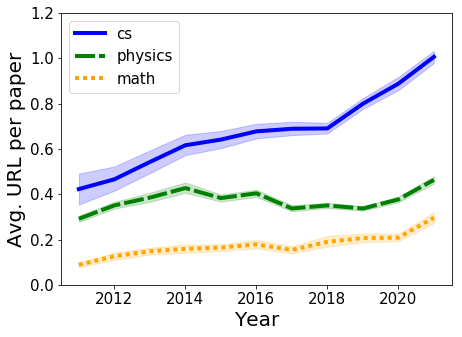

In [88]:
plt.figure(figsize = (7,5))
hue_order = ['cs','physics', 'math']
dashes = [(),(5, 1),(1, 1)]

df_temp = df_citation_count.merge(df_parsed[['PAPER_ID','file']], on='PAPER_ID', how='inner').drop(['categories','categories_top'], axis=1).drop_duplicates()
df_temp2 = df_temp.groupby('PAPER_ID').first().reset_index()

fig, ax = plt.subplots(figsize = (7,5))
#g = sns.lineplot(x='year', y='URL_count', linewidth=4, hue='categories_top_final', palette = ['blue','green','orange'], style = 'categories_top_final', data=df_citation_count)
g = sns.lineplot(x='year', y='URL_count', linewidth=4, hue='categories_top_final', palette = ['blue','green','orange'], style = 'categories_top_final', dashes = dashes, hue_order=hue_order, style_order = hue_order, data=df_temp2)
plt.ylabel('URL count')
#plt.title('Average number of URLs per paper over time', fontsize = 20)




    #plt.plot(Year, URL_code_percentage, label=field)
    #if field == 'cs':
    #    plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    #if field == 'physics':
    #    plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    #if field == 'math':
    #    plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 10)

plt.legend(['cs','physics','math'], fontsize = 15)

#plt.title('Percentage of ' + code.lower() +' over time', fontsize = 20)
plt.ylabel('Avg. URL per paper', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks([2012,2014,2016,2018,2020], fontsize = 15)
plt.yticks([0,0.2,0.4,0.6,0.8, 1.0, 1.2],fontsize = 15)
plt.show()

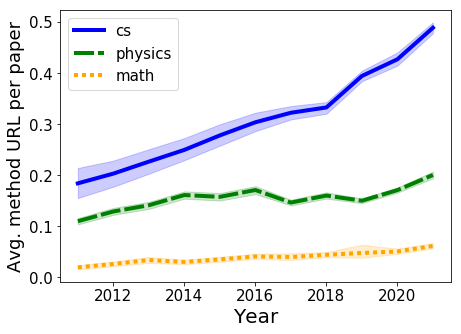

In [89]:
plt.figure(figsize = (7,5))
hue_order = ['cs','physics', 'math']
#sns.lineplot(x='year', y='URL_METHOD_count', linewidth=4, hue='categories_top_final', palette = ['blue', 'green','orange'], hue_order=hue_order, style = 'categories_top_final', data=df_citation_count_alllink2)
dashes = [(),(5, 1),(1, 1)]
# ['solid','dashed','dotted']

sns.lineplot(x='year', y='URL_METHOD_count', linewidth=4, hue='categories_top_final', palette = ['blue', 'green','orange'],  style = 'categories_top_final',dashes = dashes, hue_order=hue_order, style_order = hue_order, data=df_citation_count_alllink2)

plt.ylabel('URL count')
#plt.title('Average number of method URLs per paper over time', fontsize = 20)




    #plt.plot(Year, URL_code_percentage, label=field)
    #if field == 'cs':
    #    plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    #if field == 'physics':
    #    plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    #if field == 'math':
    #    plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(['cs','physics','math'], fontsize = 15)
#plt.legend().set_title('')

#plt.title('Percentage of ' + code.lower() +' over time', fontsize = 20)
plt.ylabel('Avg. method URL per paper', fontsize = 18)
plt.xlabel('Year', fontsize = 20)
plt.xticks( fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

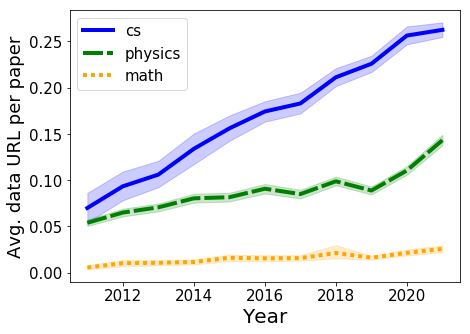

In [101]:
plt.figure(figsize = (7,5))
hue_order = ['cs','physics', 'math']
dashes = [(),(5, 1),(1, 1)]
sns.lineplot(x='year', y='URL_MATERIAL_count', linewidth=4, hue='categories_top_final', palette = ['blue','green','orange'], style = 'categories_top_final',dashes = dashes, hue_order=hue_order, style_order = hue_order, data=df_citation_count_alllink2)
plt.ylabel('URL count')
#plt.title('Average number of data URLs per paper over time', fontsize = 20)


plt.legend().set_title('')

    #plt.plot(Year, URL_code_percentage, label=field)
    #if field == 'cs':
    #    plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    #if field == 'physics':
    #    plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    #if field == 'math':
    #    plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
plt.legend(['cs','physics','math'], fontsize = 15)

#plt.title('Percentage of ' + code.lower() +' over time', fontsize = 20)

plt.ylabel('Avg. data URL per paper', fontsize = 18)
#plt.ylabel('URL count', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [114]:
df_temp[df_temp['URL_MATERIAL_count']>0]

,PAPER_ID,title,year,n_citations,URL_METHOD_LIVE_count,URL_MATERIAL_LIVE_count,URL_METHOD_DEAD_count,URL_MATERIAL_DEAD_count,categories_top_final,URL_METHOD_LIVE,URL_MATERIAL_LIVE,URL_METHOD_DEAD,URL_MATERIAL_DEAD,Link type,Link http code status,age,normalized_citation_yearly,URL_METHOD_count,URL_MATERIAL_count,file
81312,1202.1434,A DEEP SEARCH FOR THE HOST GALAXIES OF GRBS WI...,2020,20.0,0.0,0.0,1.0,1.0,physics,False,False,True,True,material only,has non 200 link(s),2,10.0,1.0,1.0,1202.1434.json
135345,1211.7068,ON THE METAL AVERSION OF LGRBS,2020,34.0,0.0,1.0,0.0,0.0,physics,False,True,False,False,material only,all link(s) 200,2,17.0,0.0,1.0,1211.7068.json
198176,1310.505,Modeling Information Diffusion in Online Socia...,2020,31.0,0.0,2.0,0.0,0.0,cs,False,True,False,False,material only,all link(s) 200,2,15.5,0.0,2.0,1310.0505.json
219989,1401.843,Least squares policy iteration with instrument...,2020,4.0,0.0,0.0,0.0,1.0,math,False,False,False,True,material only,has non 200 link(s),2,2.0,0.0,1.0,1401.0843.json
301111,1502.7661,Detecting Malware with Information Complexity,2020,14.0,0.0,0.0,0.0,1.0,cs,False,False,False,True,material only,has non 200 link(s),2,7.0,0.0,1.0,1502.07661.json
321365,1506.243,OR-Benchmark: An Open and Reconfigurable Digit...,2020,1.0,0.0,0.0,4.0,2.0,cs,False,False,True,True,material only,has non 200 link(s),2,0.5,4.0,2.0,1506.00243.json
353832,1511.2423,Globally Solving Nonconvex Quadratic Programs ...,2020,30.0,6.0,1.0,0.0,0.0,math,True,True,False,False,both method and material,all link(s) 200,2,15.0,6.0,1.0,1511.02423.json
355208,1511.4136,UA-DETRAC: A new benchmark and protocol for mu...,2020,251.0,0.0,1.0,0.0,0.0,cs,False,True,False,False,material only,all link(s) 200,2,125.5,0.0,1.0,1511.04136.json
356403,1511.5643,A New Smooth Approximation to the Zero One Los...,2020,1.0,0.0,3.0,0.0,1.0,cs,False,True,False,True,material only,has non 200 link(s),2,0.5,0.0,4.0,1511.05643.json
366951,1601.169,Braided quantum groups and their bosonization ...,2020,0.0,2.0,2.0,0.0,0.0,physics,True,True,False,False,both method and material,all link(s) 200,2,0.0,2.0,2.0,1601.00169.json


Text(0.5, 0, 'Year')

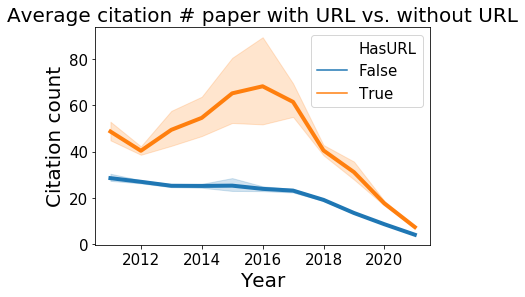

In [56]:
sns.lineplot(x='year', y='n_citations',hue='HasURL', linewidth=4 ,data=df_citation_count)
plt.ylabel('citation count')
plt.title('Average citation # paper with URL vs. without URL', fontsize = 20)
plt.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Citation count', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

Text(0.5, 0, 'Year')

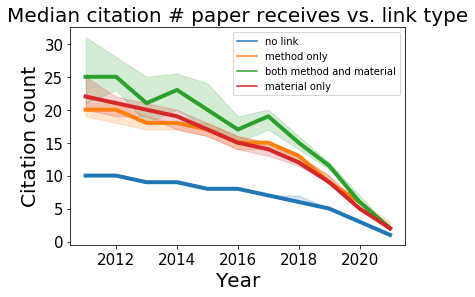

In [63]:
#sns.set_palette("PuBuGn_d")
fig, ax = plt.subplots()
g = sns.lineplot(x='year', y='n_citations',hue='Link type', linewidth=4 ,estimator=np.median,data=df_citation_count_alllink)
plt.ylabel('citation count')
#plt.title('Average citation # paper receives vs. link type', fontsize = 20)
plt.title('Median citation # paper receives vs. link type', fontsize = 20)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 10)
#plt.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Citation count', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

Text(0.5, 0, 'Year')

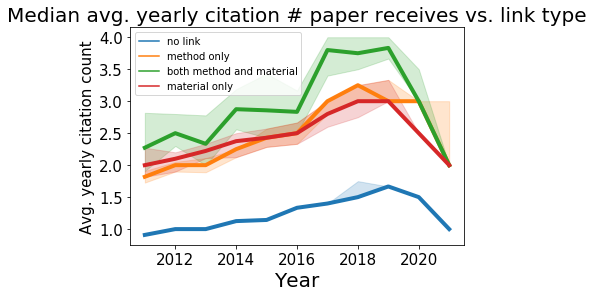

In [62]:
fig, ax = plt.subplots()
g = sns.lineplot(x='year', y='normalized_citation_yearly',hue='Link type', linewidth=4 ,estimator=np.median,data=df_citation_count_alllink)
plt.ylabel('citation count')
#plt.title('Average citation # paper receives vs. link type', fontsize = 20)
plt.title('Median avg. yearly citation # paper receives vs. link type', fontsize = 20)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 10)
#plt.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Avg. yearly citation count', fontsize = 15)
plt.xlabel('Year', fontsize = 20)

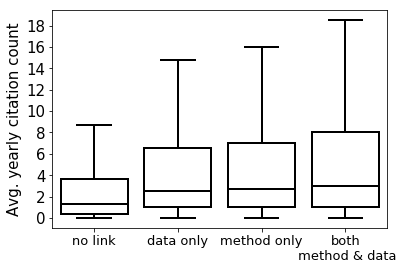

In [86]:
fig, ax = plt.subplots()
order = df_citation_count_alllink.groupby(["Link type"])["normalized_citation_yearly"].mean().sort_values().index
#g = sns.barplot(x='Link type', y='normalized_citation_yearly', linewidth=4 ,estimator=np.mean,data=df_citation_count_alllink, order=order)
g = sns.boxplot(x='Link type', y='normalized_citation_yearly', linewidth=2 ,data=df_citation_count_alllink2, order=order, color='white',showfliers = False)
plt.ylabel('citation count')
#plt.title('Average citation # paper receives vs. link accessibility', fontsize = 20)
#plt.title('Mean avg. yearly citation # paper receives vs. link type', fontsize = 15)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 10)
#plt.legend(fontsize = 15)

#['no link','material only','method only','both method and material']

plt.xticks([0,1,2,3],['no link','data only','method only','both\n method & data'],fontsize = 13)
plt.yticks([0,2,4,6,8,10,12,14,16,18], fontsize = 15)
plt.ylabel('Avg. yearly citation count', fontsize = 15)
#plt.xlabel('Year', fontsize = 20)
#plt.xticks(rotation=15)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(g.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

Text(0.5, 0, 'Year')

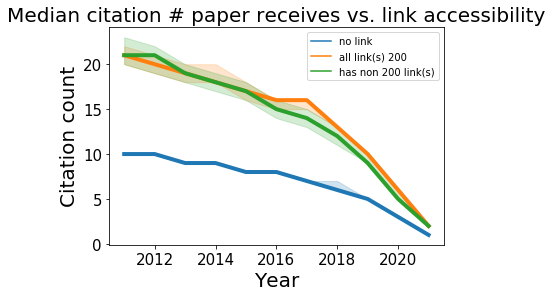

In [64]:
fig, ax = plt.subplots()
g = sns.lineplot(x='year', y='n_citations',hue='Link http code status', linewidth=4 ,estimator=np.median,data=df_citation_count_alllink)
plt.ylabel('citation count')
#plt.title('Average citation # paper receives vs. link accessibility', fontsize = 20)
plt.title('Median citation # paper receives vs. link accessibility', fontsize = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 10)
#plt.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Citation count', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

Text(0.5, 0, 'Year')

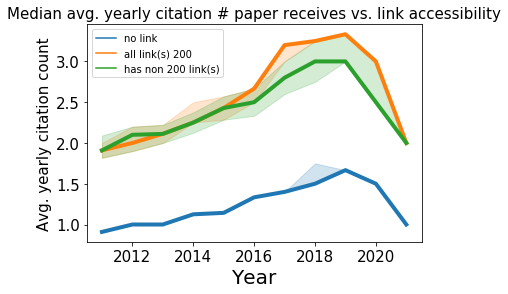

In [65]:
fig, ax = plt.subplots()
#g = sns.lineplot(x='year', y='normalized_citation_yearly',hue='Link http code status', linewidth=4 ,estimator=np.median,data=df_citation_count_alllink)

g = sns.lineplot(x='year', y='normalized_citation_yearly',hue='Link http code status', linewidth=4 ,estimator=np.median,data=df_citation_count_alllink)
plt.ylabel('citation count')
#plt.title('Average citation # paper receives vs. link accessibility', fontsize = 20)
plt.title('Median avg. yearly citation # paper receives vs. link accessibility', fontsize = 15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 10)
#plt.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Avg. yearly citation count', fontsize = 15)
plt.xlabel('Year', fontsize = 20)

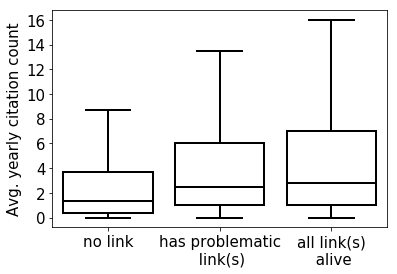

In [78]:
fig, ax = plt.subplots()

order = df_citation_count_alllink.groupby(["Link http code status"])["normalized_citation_yearly"].mean().sort_values().index
#g = sns.barplot(x='Link http code status', y='normalized_citation_yearly', linewidth=4 ,estimator=np.mean,data=df_citation_count_alllink, order=order, showfliers = False)

g = sns.boxplot(x='Link http code status', y='normalized_citation_yearly', linewidth=2 ,data=df_citation_count_alllink2, order=order, color='white',showfliers = False)

plt.ylabel('citation count')
#plt.title('Average citation # paper receives vs. link accessibility', fontsize = 20)
#plt.title('Mean avg. yearly citation # paper receives vs. link accessibility', fontsize = 15)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 10)
#plt.legend(fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks([0,2,4,6,8,10,12,14,16], fontsize = 15)
plt.ylabel('Avg. yearly citation count', fontsize = 15)
#plt.xlabel('Year', fontsize = 20)
g.set_xticklabels(['no link','has problematic\n link(s)','all link(s)\n alive'])
#plt.xticks( rotation=15)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(g.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

In [86]:
df_citation_count['age'] = 2022-df_citation_count['year']
df_citation_count['age_squared'] = df_citation_count['age']*df_citation_count['age']

In [87]:
df_citation_count['log_citation'] = np.log(df_citation_count['n_citations']+1)

In [91]:
df_citation_count['hasURL'] = df_citation_count['URL_count']>0

In [92]:
df_citation_count_original = df_citation_count
df_citation_count = df_citation_count[df_citation_count['year']>2009]

In [79]:
import statsmodels.formula.api as smf

In [103]:
#mod = smf.ols(formula='n_citations~ hasURL + C(year) +C(categories_top_final)', data=df_citation_count)
mod = smf.ols(formula='n_citations~ hasURL + age + C(categories_top_final)', data=df_citation_count)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            n_citations   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1150.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:23:41   Log-Likelihood:            -8.4848e+06
No. Observations:             1238777   AIC:                         1.697e+07
Df Residuals:                 1238772   BIC:                         1.697e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [49]:
# alternative analysis involving different categories of links: material/method live/dead
df_citation_count_alllink['age'] = 2022-df_citation_count_alllink['year']
df_citation_count_alllink['age_squared'] = df_citation_count_alllink['age']*df_citation_count_alllink['age']

df_citation_count_alllink['log_citation'] = np.log(df_citation_count_alllink['n_citations']+1)

In [87]:
df_citation_count_alllink2['age'] = 2022-df_citation_count_alllink2['year']
df_citation_count_alllink2['age_squared'] = df_citation_count_alllink2['age']*df_citation_count_alllink2['age']

df_citation_count_alllink2['log_citation'] = np.log(df_citation_count_alllink2['n_citations']+1)

In [81]:
import statsmodels.formula.api as smf

In [88]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='log_citation~ URL_METHOD_LIVE + URL_MATERIAL_LIVE + URL_METHOD_DEAD+ URL_MATERIAL_DEAD+ age + age_squared +  C(categories_top_final) + C(year)', data=df_citation_count_alllink2)

#mod = smf.ols(formula='log_citation~ URL_METHOD_LIVE + URL_MATERIAL_LIVE + URL_METHOD_DEAD+ URL_MATERIAL_DEAD+ age + age_squared +  C(categories_top_final)', data=df_citation_count_alllink)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           log_citation   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        00:46:47   Log-Likelihood:            -1.6853e+06
No. Observations:             1029833   AIC:                         3.371e+06
Df Residuals:                 1029814   BIC:                         3.371e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [89]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_train = df_citation_count_alllink2
expr = """n_citations~ URL_METHOD_LIVE + URL_MATERIAL_LIVE + URL_METHOD_DEAD+ URL_MATERIAL_DEAD + age + age_squared + categories_top_final"""
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            n_citations   No. Observations:              1029833
Model:                            GLM   Df Residuals:                  1029824
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.0640e+07
Date:                Fri, 05 May 2023   Deviance:                   5.7792e+07
Time:                        00:47:04   Pearson chi2:                 7.67e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [90]:
df_train['BB_LAMBDA'] = poisson_training_results.mu
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['n_citations'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)


ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df_train).fit()
print(aux_olsr_results.params)

nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())

BB_LAMBDA    64.920079
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:            n_citations   No. Observations:              1029833
Model:                            GLM   Df Residuals:                  1029824
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.5824e+06
Date:                Fri, 05 May 2023   Deviance:                       54706.
Time:                        00:48:38   Pearson chi2:                 2.81e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
# add year effect

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_train = df_citation_count_alllink
#expr = """n_citations~ URL_METHOD_LIVE + URL_MATERIAL_LIVE + URL_METHOD_DEAD+ URL_MATERIAL_DEAD + age + age_squared + categories_top_final + C(year)"""
expr = """n_citations~ URL_METHOD_LIVE + URL_MATERIAL_LIVE + URL_METHOD_DEAD+ URL_MATERIAL_DEAD + age + age_squared + categories_top_final """
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

In [ ]:
df_train['BB_LAMBDA'] = poisson_training_results.mu
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['n_citations'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)


ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df_train).fit()
print(aux_olsr_results.params)

nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())

In [85]:
# Define function to output plot of the model coefficients

# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    #coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()

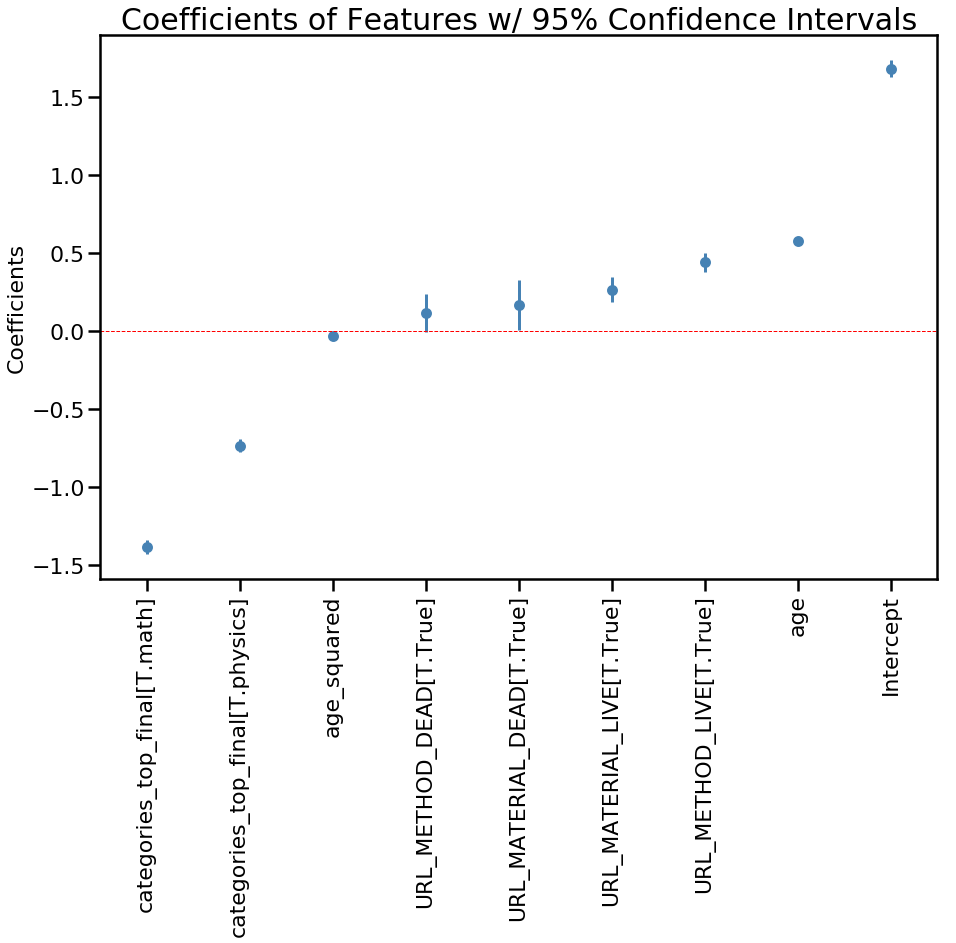

In [86]:
coefplot(nb2_training_results)

In [91]:
def coefplot2(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    #coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    fig, ax= plt.subplots(figsize=(15, 10))
    
    coef_df.plot(y='coef',x='variables',  kind='barh',
                  color='none',fontsize=22, 
                 ecolor='steelblue',capsize=0,ax = ax,
                 xerr='errors', legend=False)
    
    # Set title & labels
    #plt.title('Regression coefficients',fontsize=30)
    ax.set_xlabel('Coefficients',fontsize=22)
    ax.set_ylabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(y=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               x=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

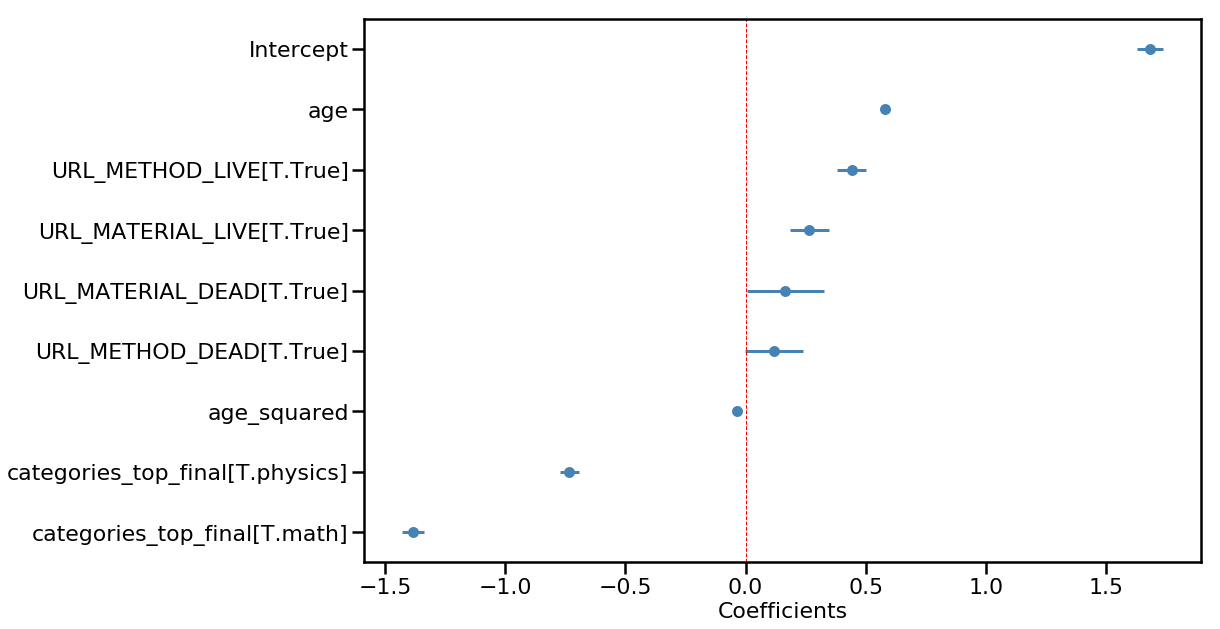

In [92]:
coefplot2(nb2_training_results)

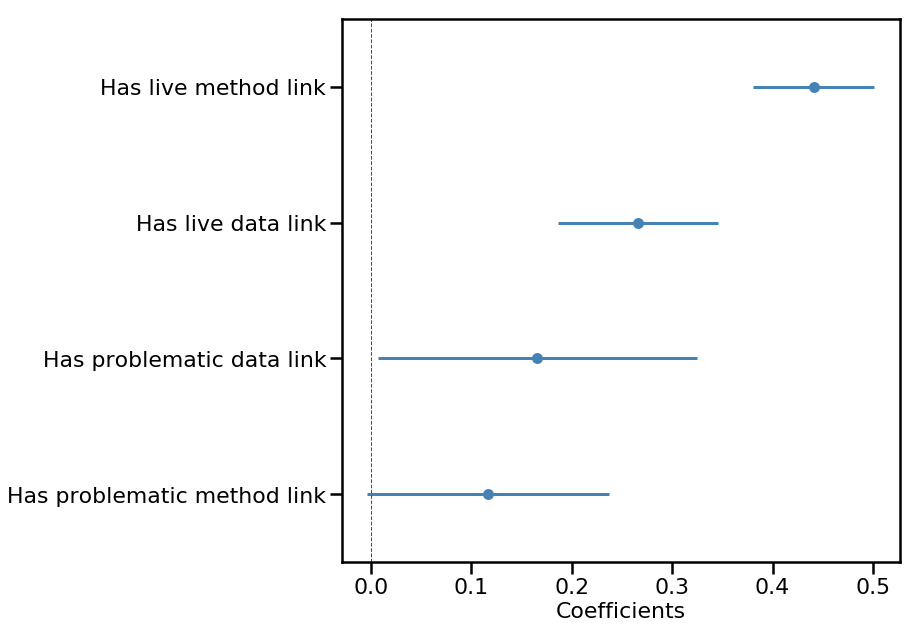

In [93]:
    # Create dataframe of results summary 
    results = nb2_training_results
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    #coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    coef_df = coef_df.replace(['URL_METHOD_DEAD[T.True]'],'Has problematic method link')
    coef_df = coef_df.replace(['URL_MATERIAL_DEAD[T.True]'],'Has problematic data link')
    coef_df = coef_df.replace(['URL_METHOD_LIVE[T.True]'],'Has live method link')
    coef_df = coef_df.replace(['URL_MATERIAL_LIVE[T.True]'],'Has live data link')
    coef_df = coef_df[coef_df['variables'].isin(['Has problematic data link','Has problematic method link','Has live method link','Has live data link'])]

    
    #fig, ax= plt.subplots(figsize=(15, 10))
    fig, ax= plt.subplots(figsize=(10, 10))
    
    coef_df.plot(y='coef',x='variables',  kind='barh',
                  color='none',fontsize=22, 
                 ecolor='steelblue',capsize=0,ax = ax,
                 xerr='errors', legend=False)
    
    # Set title & labels
    #plt.title('Regression coefficients',fontsize=30)
    ax.set_xlabel('Coefficients',fontsize=22)
    ax.set_ylabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(y=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               x=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

In [121]:
 pd.DataFrame(results.summary().tables[1].data)

,0,1,2,3,4,5,6
0,,coef,std err,z,P>|z|,[0.025,0.975]
1,Intercept,1.6824,0.028,59.253,0.000,1.627,1.738
2,URL_METHOD_LIVE[T.True],0.4412,0.031,14.274,0.000,0.381,0.502
3,URL_MATERIAL_LIVE[T.True],0.2658,0.041,6.521,0.000,0.186,0.346
4,URL_METHOD_DEAD[T.True],0.1167,0.061,1.901,0.057,-0.004,0.237
5,URL_MATERIAL_DEAD[T.True],0.1658,0.081,2.042,0.041,0.007,0.325
6,categories_top_final[T.math],-1.3833,0.023,-59.552,0.000,-1.429,-1.338
7,categories_top_final[T.physics],-0.7340,0.021,-35.611,0.000,-0.774,-0.694
8,age,0.5791,0.011,53.691,0.000,0.558,0.600
9,age_squared,-0.0336,0.001,-36.321,0.000,-0.035,-0.032


# mean number of reused links over year

In [99]:
df_paper_link = df.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_count'})
df_paper_link = df_paper_link[['PAPER_ID','URL_count']]
df_paper_link['PAPER_ID'] =df_paper_link['PAPER_ID'].astype('str')

In [100]:
# reload df to ensure it starts from the very beginning
df = pd.read_csv('detected_arxiv_url_info_100422.tsv', sep='\t')
df = df[df['categories_top_final'].isin(['cs','math','physics'])]
df['PAPER_ID'] = df['PAPER_ID'].astype('str')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df

,Unnamed: 0,Unnamed: 0.1,PAPER_ID,SEC_INDEX,POS_INDEX,SECTION,IsFOOTNOTE,FOOTNOTE,CONTEXT,CONTEXT_PAR,...,SECTION_TOTAL,SECTION_POS_PROPORTION,PAR_TOTAL_LENGTH,PAR_INDEX,PAR_POS_PROPORTION,PAR_POS_PROPORTION_bin,SECTION_POS_PROPORTION_bin,title,n_citations,IsStatus200
61,61,109799,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,NaN,NaN,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,1
62,62,109800,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,NaN,NaN,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,1
63,63,116590,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,NaN,NaN,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1
64,64,116591,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,NaN,NaN,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,1
65,65,117764,1207.3836,body_text,4,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,It was followed up photometrically by VSNET FO...,"In this paper, we present optical spectroscopy...",...,12.0,0.166667,47.0,13.0,0.276596,30%,20%,CSS100603:112253−111037: a helium-rich dwarf n...,35.0,1
66,66,185828,1409.939,body_text,7,Observations and data analysis,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,In order to assess when the low and high optic...,In order to assess when the low and high optic...,...,21.0,0.190476,64.0,19.0,0.296875,30%,20%,X-Ray Observations of VY Scl-Type Nova-Like Bi...,14.0,1
67,67,189519,1407.1907,body_text,23,Notes on individual objects::AM CVn systems an...,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,An outburst spectrum of CRTS J102842.9-081927 ...,There are several other AM CVn candidates and ...,...,28.0,0.250000,121.0,36.0,0.297521,30%,30%,1000 cataclysmic variables from the catalina r...,62.0,1
68,68,212384,1506.8526,body_text,1,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,VSNET alert-news FOOTREF2 reported on the dete...,P. Berardi (cf. TOCP) on Oct 30.8 UT and Santa...,...,8.0,0.250000,37.0,8.0,0.216216,30%,30%,"Outburst evolution, historic light curve and a...",0.0,1
69,69,213305,1502.14,body_text,5,Introduction Introduction,1,"VSNET, at http://www.kusastro.kyoto-u.ac.jp/vs...",MLS110213 is included in the RK catalogue base...,"As of June 2014 FOOTREF5 , 114 polars have bee...",...,15.0,0.133333,65.0,14.0,0.215385,30%,20%,MLS110213:022733+130617: A new eclipsing polar...,6.0,1
70,70,341762,1802.6659,body_text,7,Observations of a bright microlensing event,1,See and http://www.kusastro.kyoto-u.ac.jp/vsnet/,Following a VSNET (Variable Star Network FOOTR...,Following a VSNET (Variable Star Network FOOTR...,...,7.0,0.428571,58.0,20.0,0.344828,40%,50%,Discovery of a bright microlensing event with ...,15.0,1


In [69]:
# get the time that a specific url first appears


In [42]:
freq = [i[1] for i in collections.Counter(df['URLS_reextracted_normalized']).most_common()]
url = [i[0] for i in collections.Counter(df['URLS_reextracted_normalized']).most_common()]

In [65]:
# need to make sure df starts from the *very* beginning of the dataset instead of the cutoff year of analysis
URL_first_year = {}
count = 0
for u in url:
    count+=1
    if count%1000==0:
        print (count)
    df_temp = df[df['URLS_reextracted_normalized']==u]
    URL_first_year[u]=min(df_temp['year'])
    
pd.DataFrame(list(URL_first_year.items()), columns=['URLS_reextracted_normalized', 'Year_first_appear']).to_csv('URL_first_appearance_year.csv')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [34]:
URL_first_year_df = pd.read_csv('URL_first_appearance_year_updated.csv')

In [36]:
min(URL_first_year_df['Year_first_appear'])

1993

In [37]:
df_first_appear = df.merge(URL_first_year_df, on = 'URLS_reextracted_normalized', how = 'left')
df_first_appear['reused_link'] = df_first_appear['Year_first_appear']<df_first_appear['year']

In [38]:
df_first_appear

,Unnamed: 0_x,Unnamed: 0.1,PAPER_ID,SEC_INDEX,POS_INDEX,SECTION,IsFOOTNOTE,FOOTNOTE,CONTEXT,CONTEXT_PAR,...,PAR_TOTAL_LENGTH,PAR_INDEX,PAR_POS_PROPORTION,PAR_POS_PROPORTION_bin,SECTION_POS_PROPORTION_bin,title,n_citations,Unnamed: 0_y,Year_first_appear,reused_link
0,61,109799,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,52414,1997,True
1,62,109800,1206.308,body_text,7,The data base,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,Further timings were drawn from the Japanese V...,A large body of primary and secondary mid-ecli...,...,77.0,9.0,0.116883,20%,NaN,Coulomb drag in graphene-boron nitride heteros...,11.0,52414,1997,True
2,63,116590,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,52414,1997,True
3,64,116591,1212.594,body_text,5,Observation and Data Analysis::Light-curves,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,We analyzed all the data on ER UMa available i...,We analyzed all the data on ER UMa available i...,...,347.0,7.0,0.020173,10%,NaN,A Mixed Linear Quadratic Optimal Control Probl...,4.0,52414,1997,True
4,65,117764,1207.3836,body_text,4,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,It was followed up photometrically by VSNET FO...,"In this paper, we present optical spectroscopy...",...,47.0,13.0,0.276596,30%,20%,CSS100603:112253−111037: a helium-rich dwarf n...,35.0,52414,1997,True
5,66,185828,1409.939,body_text,7,Observations and data analysis,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,In order to assess when the low and high optic...,In order to assess when the low and high optic...,...,64.0,19.0,0.296875,30%,20%,X-Ray Observations of VY Scl-Type Nova-Like Bi...,14.0,52414,1997,True
6,67,189519,1407.1907,body_text,23,Notes on individual objects::AM CVn systems an...,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,An outburst spectrum of CRTS J102842.9-081927 ...,There are several other AM CVn candidates and ...,...,121.0,36.0,0.297521,30%,30%,1000 cataclysmic variables from the catalina r...,62.0,52414,1997,True
7,68,212384,1506.8526,body_text,1,Introduction,1,http://www.kusastro.kyoto-u.ac.jp/vsnet/,VSNET alert-news FOOTREF2 reported on the dete...,P. Berardi (cf. TOCP) on Oct 30.8 UT and Santa...,...,37.0,8.0,0.216216,30%,30%,"Outburst evolution, historic light curve and a...",0.0,52414,1997,True
8,69,213305,1502.14,body_text,5,Introduction Introduction,1,"VSNET, at http://www.kusastro.kyoto-u.ac.jp/vs...",MLS110213 is included in the RK catalogue base...,"As of June 2014 FOOTREF5 , 114 polars have bee...",...,65.0,14.0,0.215385,30%,20%,MLS110213:022733+130617: A new eclipsing polar...,6.0,52414,1997,True
9,70,341762,1802.6659,body_text,7,Observations of a bright microlensing event,1,See and http://www.kusastro.kyoto-u.ac.jp/vsnet/,Following a VSNET (Variable Star Network FOOTR...,Following a VSNET (Variable Star Network FOOTR...,...,58.0,20.0,0.344828,40%,50%,Discovery of a bright microlensing event with ...,15.0,52414,1997,True


In [62]:
df_first_appear_temp = df_first_appear[df_first_appear['reused_link']==True]

df_paper_link_reused = df_first_appear_temp.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_count'})
df_paper_link_reused = df_paper_link_reused[['PAPER_ID','URL_count']]
df_paper_link_reused['PAPER_ID'] =df_paper_link_reused['PAPER_ID'].astype('str')

df_citation_count_alllink_reused = df_citation.merge(df_paper_link_reused, on = 'PAPER_ID', how='left')
df_citation_count_alllink_reused = df_citation_count_alllink_reused.fillna(0)

df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']>1990]
df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']<2023]

df_citation_count_alllink_reused = df_citation_count_alllink_reused.merge(df_field, on = 'PAPER_ID', how='inner')

In [63]:
df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']>=2011]
df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']<=2021]

df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['categories_top_final'].isin(['cs','physics','math'])]

df_citation_count_alllink_reused['year'] = df_citation_count_alllink_reused['year'].astype('str')

df_citation_count_alllink_reused.rename(columns={'categories_top_final': 'field'}, inplace=True)

In [64]:
# load in and join with the final LaTex papers that we analyzed
df_parsed = pd.read_csv('Latex_parsed_papers_in_three_fields_2011-2021.csv')

In [65]:
df_temp = df_citation_count_alllink_reused.merge(df_parsed[['PAPER_ID','file']], on='PAPER_ID', how='inner').drop(['categories','categories_top'], axis=1).drop_duplicates()
df_temp3 = df_temp.groupby('PAPER_ID').first().reset_index()

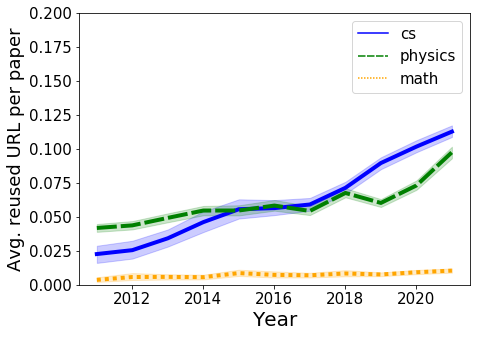

In [117]:
#plt.figure(figsize = (7,5))
hue_order = ['cs','physics', 'math']
dashes = [(),(5, 1),(1, 1)]
#sns.lineplot(x='year', y='URL_MATERIAL_count', linewidth=4, hue='categories_top_final', palette = ['blue','green','orange'], style = 'categories_top_final',dashes = dashes, hue_order=hue_order, style_order = hue_order, data=df_citation_count_alllink2)
#plt.ylabel('URL count')
df_citation_count_alllink_reused2 = df_temp3

fig, ax = plt.subplots(figsize = (7,5))
g =sns.lineplot(x='year', y='URL_count', linewidth=4, hue='field', palette = ['blue','green','orange'], style = 'field', dashes = dashes, hue_order=hue_order, style_order = hue_order,data=df_citation_count_alllink_reused2)
plt.ylabel('URL count')
#plt.title('Average number of reused URLs per paper over time', fontsize = 20)




    #plt.plot(Year, URL_code_percentage, label=field)
    #if field == 'cs':
    #    plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    #if field == 'physics':
    #    plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    #if field == 'math':
    #    plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 15)
#plt.legend(fontsize = 15)

#plt.title('Percentage of ' + code.lower() +' over time', fontsize = 20)
plt.ylabel('Avg. reused URL per paper', fontsize = 18)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)

plt.xticks(['2012','2014','2016','2018','2020'])
plt.yticks(fontsize = 15)
plt.ylim([0,0.2])
plt.show()

<Figure size 504x360 with 0 Axes>

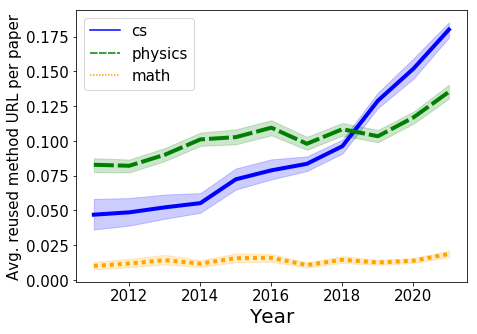

In [115]:
plt.figure(figsize = (7,5))
hue_order = ['cs','physics', 'math']
dashes = [(),(5, 1),(1, 1)]

df_first_appear_temp = df_first_appear[df_first_appear['reused_link']==True]
df_first_appear_temp = df_first_appear_temp[df_first_appear_temp['label']=='Method']

df_paper_link_reused = df_first_appear_temp.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_count'})
df_paper_link_reused = df_paper_link_reused[['PAPER_ID','URL_count']]
df_paper_link_reused['PAPER_ID'] =df_paper_link_reused['PAPER_ID'].astype('str')

df_citation_count_alllink_reused = df_citation.merge(df_paper_link_reused, on = 'PAPER_ID', how='left')
df_citation_count_alllink_reused = df_citation_count_alllink_reused.fillna(0)

df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']>1990]
df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']<2023]

df_citation_count_alllink_reused = df_citation_count_alllink_reused.merge(df_field, on = 'PAPER_ID', how='inner')


df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']>=2011]
df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']<=2021]

df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['categories_top_final'].isin(['cs','physics','math'])]


df_citation_count_alllink_reused['year'] = df_citation_count_alllink_reused['year'].astype('str')

df_citation_count_alllink_reused.rename(columns={'categories_top_final': 'field'}, inplace=True)

df_temp = df_citation_count_alllink_reused.merge(df_parsed[['PAPER_ID','file']], on='PAPER_ID', how='inner').drop(['categories','categories_top'], axis=1).drop_duplicates()
df_temp3 = df_temp.groupby('PAPER_ID').first().reset_index()


fig, ax = plt.subplots(figsize = (7,5))
g = sns.lineplot(x='year', y='URL_count', linewidth=4, hue='field', palette = ['blue','green','orange'], style = 'field', dashes = dashes, hue_order=hue_order, style_order = hue_order,data=df_temp3)
#g = sns.lineplot(x='year', y='URL_count', linewidth=4, hue='field', palette = ['blue','green','orange'], style = 'field', data=df_citation_count_alllink_reused)
plt.ylabel('URL count')
#plt.title('Average number of reused method URLs per paper over time', fontsize = 20)




    #plt.plot(Year, URL_code_percentage, label=field)
    #if field == 'cs':
    #    plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    #if field == 'physics':
    #    plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    #if field == 'math':
    #    plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 15)
#plt.legend(fontsize = 15)

#plt.title('Percentage of ' + code.lower() +' over time', fontsize = 20)
plt.ylabel('Avg. reused method URL per paper', fontsize = 15)
plt.xlabel('Year', fontsize = 20)
plt.xticks(['2012','2014','2016','2018','2020'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

<Figure size 504x360 with 0 Axes>

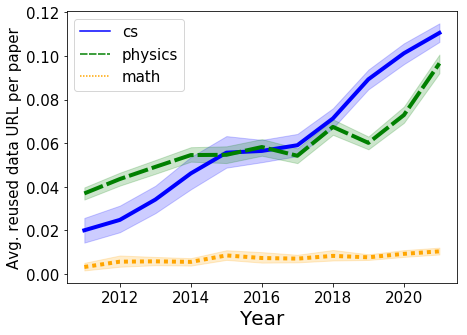

In [67]:
plt.figure(figsize = (7,5))
hue_order = ['cs','physics', 'math']
dashes = [(),(5, 1),(1, 1)]

df_first_appear_temp = df_first_appear[df_first_appear['reused_link']==True]
df_first_appear_temp = df_first_appear_temp[df_first_appear_temp['label']=='Material']

df_paper_link_reused = df_first_appear_temp.groupby('PAPER_ID').aggregate('count').reset_index()[['PAPER_ID','URLS']].reset_index().rename(columns={'URLS': 'URL_count'})
df_paper_link_reused = df_paper_link_reused[['PAPER_ID','URL_count']]
df_paper_link_reused['PAPER_ID'] =df_paper_link_reused['PAPER_ID'].astype('str')

df_citation_count_alllink_reused = df_citation.merge(df_paper_link_reused, on = 'PAPER_ID', how='left')
df_citation_count_alllink_reused = df_citation_count_alllink_reused.fillna(0)

df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']>1990]
df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']<2023]

df_citation_count_alllink_reused = df_citation_count_alllink_reused.merge(df_field, on = 'PAPER_ID', how='inner')


df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']>=2011]
df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['year']<=2021]

df_citation_count_alllink_reused = df_citation_count_alllink_reused[df_citation_count_alllink_reused['categories_top_final'].isin(['cs','physics','math'])]


df_citation_count_alllink_reused['year'] = df_citation_count_alllink_reused['year'].astype('str')

df_citation_count_alllink_reused.rename(columns={'categories_top_final': 'field'}, inplace=True)


df_temp = df_citation_count_alllink_reused.merge(df_parsed[['PAPER_ID','file']], on='PAPER_ID', how='inner').drop(['categories','categories_top'], axis=1).drop_duplicates()
df_temp3 = df_temp.groupby('PAPER_ID').first().reset_index()

fig, ax = plt.subplots(figsize = (7,5))
g = sns.lineplot(x='year', y='URL_count', linewidth=4, hue='field', palette = ['blue','green','orange'], style = 'field', dashes = dashes, hue_order=hue_order, style_order = hue_order,data=df_temp3)
plt.ylabel('URL count')
#plt.title('Average number of reused data URLs per paper over time', fontsize = 20)




    #plt.plot(Year, URL_code_percentage, label=field)
    #if field == 'cs':
    #    plt.plot(Year, URL_code_percentage, color = 'blue', linewidth=4,linestyle = 'solid', label=field)
    #if field == 'physics':
    #    plt.plot(Year, URL_code_percentage, color = 'green',linewidth=4, linestyle = 'dashed', label=field)
    #if field == 'math':
    #    plt.plot(Year, URL_code_percentage, color = 'orange', linewidth=4, linestyle = 'dotted', label=field)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],fontsize = 15)
#plt.legend(fontsize = 15)

#plt.title('Percentage of ' + code.lower() +' over time', fontsize = 20)
plt.ylabel('Avg. reused data URL per paper', fontsize = 15)
plt.xticks(['2012','2014','2016','2018','2020'])
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# breakdown by field

Text(0.5, 1.0, 'Top method links across field')

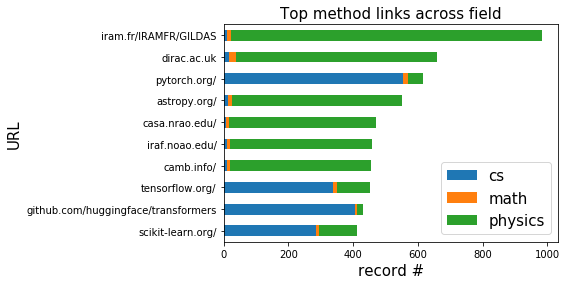

In [125]:
# get top columns across all fields
col = 'URLS_reextracted_normalized_stripped'
top = 10
#df_temp = df[['PAPER_ID',col,'categories_top_final']].drop_duplicates()
df_temp = df[['PAPER_ID',col,'categories_top_final','label']]

df_temp = df_temp[df_temp['label']=='Method']
top_list = collections.Counter(df_temp[col]).most_common(top)
key = [i[0] for i in  top_list]
freq = [i[1] for i in  top_list]

df_plot = pd.DataFrame()
field_list = list(set(df_temp['categories_top_final']))
#for field in field_list:
for field in ['cs','math','physics']:
    l = []
    df_temp_field = df_temp[df_temp['categories_top_final']==field]
    for k in key:
        l.append(len(df_temp_field[df_temp_field[col]==k]))
    df_plot[field] = l
df_plot['index'] = key
df_plot = df_plot.set_index(['index'])
df_plot.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('URL', fontsize=15)
#plt.xlabel('paper #')
plt.legend(fontsize = 15)
plt.xlabel('record #', fontsize=15)
plt.title('Top method links across field', fontsize=15)

Text(0.5, 1.0, 'Top suffix across field')

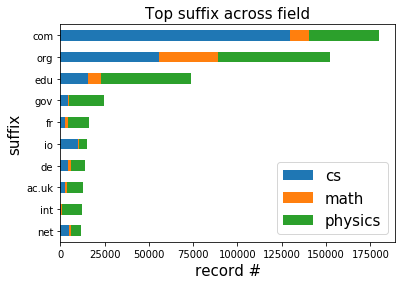

In [132]:
# get top columns across all fields
col = 'suffix'
top = 10
#df_temp = df[['PAPER_ID',col,'categories_top_final']].drop_duplicates()
df_temp = df[['PAPER_ID',col,'categories_top_final','label']]

#df_temp = df_temp[df_temp['label']=='Method']
top_list = collections.Counter(df_temp[col]).most_common(top)
key = [i[0] for i in  top_list]
freq = [i[1] for i in  top_list]

df_plot = pd.DataFrame()
field_list = list(set(df_temp['categories_top_final']))
#for field in field_list:
for field in ['cs','math','physics']:
    l = []
    df_temp_field = df_temp[df_temp['categories_top_final']==field]
    for k in key:
        l.append(len(df_temp_field[df_temp_field[col]==k]))
    df_plot[field] = l
df_plot['index'] = key
df_plot = df_plot.set_index(['index'])
df_plot.iloc[::-1].plot(kind='barh', stacked=True)
plt.ylabel('suffix', fontsize=15)
#plt.xlabel('paper #')
plt.legend(fontsize = 15)
plt.xlabel('record #', fontsize=15)
plt.title('Top suffix across field', fontsize=15)

In [204]:
def label_phy(x, color, label):
    ax = plt.gca()
    ax.text(-0.2, .1, label, fontweight="bold", color='g',fontsize = 15,
            ha="left", va="center", transform=ax.transAxes)
        
def label_cs(x, color, label):
    ax = plt.gca()
    ax.text(-0.2, .1, label, fontweight="bold", color='blue',fontsize = 15,
            ha="left", va="center", transform=ax.transAxes)
        
def label_math(x, color, label):
    ax = plt.gca()
    ax.text(-0.2, .1, label, fontweight="bold", color='orange',fontsize = 15,
            ha="left", va="center", transform=ax.transAxes)
    
def plot_curve_shape_over_time(field, col='domain',top=10):
    df_plot = df[df['categories_top_final']==field]
    top_list = []
    df_freq = collections.Counter(df_plot[col]).most_common()
    for i in range(top):
        top_list = [unit[0] for unit in df_freq[0:top]]

    df_plot_freq_trail = df_plot[df_plot[col].isin(top_list)]

    df_plot_freq_trail = df_plot_freq_trail.set_index(col)
    df_plot_freq_trail = df_plot_freq_trail.loc[top_list].reset_index()

    ridge_plot = sns.FacetGrid(df_plot_freq_trail, row=col, hue=col, aspect=5, height=1.25)
    # Use map function to make density plot in each element of the grid.
    #ridge_plot.map(sns.kdeplot, "year", clip_on=False, shade=True, alpha=0.7, lw=4, bw=0.5)
    #ridge_plot.map(sns.distplot, "year", stat='percent', discrete=True)
    if field == 'physics':
        ridge_plot.map(sns.distplot, "year", hist=True, kde=False, bins = 10, norm_hist=True, hist_kws={"histtype": "bar","color":'g','rwidth':1,'lw':4})
        ridge_plot.map(plt.axhline, y=0, lw=6, clip_on=False,color='g')
        ridge_plot.map(label_phy, "year")
    if field == 'cs':
        ridge_plot.map(sns.distplot, "year", hist=True, kde=False, bins = 10, norm_hist=True, hist_kws={"histtype": "bar","color":'blue','rwidth':1,'lw':4})
        ridge_plot.map(plt.axhline, y=0, lw=6, clip_on=False,color='blue') 
        ridge_plot.map(label_cs, "year")
    if field == 'math':
        ridge_plot.map(sns.distplot, "year", hist=True, kde=False, bins = 10, norm_hist=True, hist_kws={"histtype": "bar","color":'orange','rwidth':1,'lw':4})
        ridge_plot.map(plt.axhline, y=0, lw=6, clip_on=False,color='orange')
        ridge_plot.map(label_math, "year")
    #ridge_plot.map(label, "year",field)
    # Set the subplots to overlap
    ridge_plot.fig.subplots_adjust(hspace=-0.01)
    # Remove axes details that don't play well with overlap
    ridge_plot.set_titles("")
    ridge_plot.set(yticks=[])
    
    ridge_plot.set(ylabel="")
    plt.xticks(fontsize=15)
    plt.xlabel('Year',fontsize=15)
    #ridge_plot.set_xlabel("CO2 Emission",fontsize=30)
    ridge_plot.despine(bottom=True, left=True)
    #ridge_plot.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)
    ridge_plot.fig.suptitle(str(field), fontsize = 15)

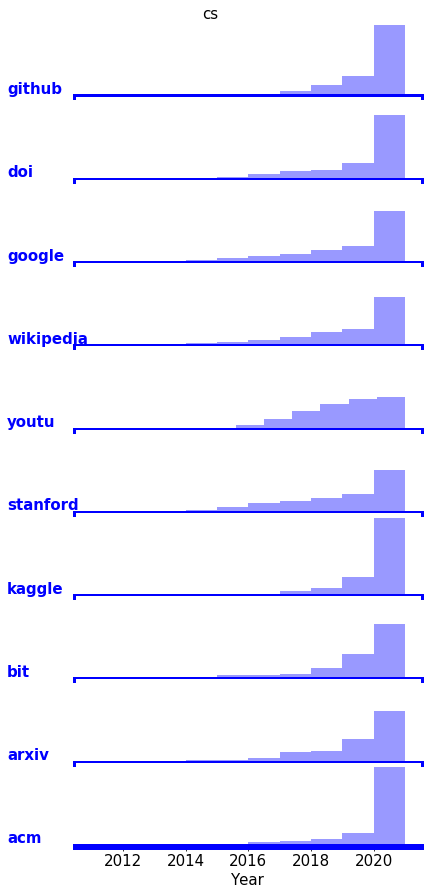

In [205]:
plot_curve_shape_over_time('cs', col='domain',top=10)